<a href="https://colab.research.google.com/github/ccwu0918/Blockchain-Implementation-in-Python-from-Scratch/blob/main/BlockChain_NFT_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NFT 智能合約開發全攻略! 發行NFT 背後的技術實戰及原理! 盲盒、公開發售怎麼做到的?

https://github.com/ccwu0918/nqu_meta/blob/master/contracts/nqu_meta_nft.sol

https://youtu.be/3vWw9Xt48bs?si=p3-sw4TgWSTqvhPs

以下是影片中提到的連結

•	Metamask 安裝-
https://metamask.io/

•	Sepolia faucet 測試幣領取-
1. https://www.alchemy.com/faucets/ethereum-sepolia
2. https://faucet.chainstack.com/sepolia-testnet-faucet
3. https://sepoliafaucet.com/
4. https://www.ankr.com/rpc/eth/eth_sepolia/
5. https://faucet.quicknode.com/ethereum/sepolia
6. https://getblock.io/faucet/eth-sepolia/
7. https://github.com/eth-clients/sepolia

•	Monad Testnet 測試幣領取-
1. https://www.alchemy.com/faucets/monad-testnet

•	MegaETH Testnet 測試幣領取-
https://thirdweb.com/megaeth-testnet

•	ETH 線上編輯器-
https://remix.ethereum.org

•	Nic Meta 智能合約範例-
https://github.com/niclin/nic_meta/blob/master/contracts/nic_meta_nft.sol

•	ETH 轉Gwei -
https://eth-converter.com

•	OpenSea 測試網路-
https://testnets.opensea.io

•	HashLips 組圖專案-
https://github.com/HashLips/hashlips_art_engine

•	IPFS 上傳空間-
https://www.pinata.cloud/

章節
00:00 實戰前說明
01:53 合約開發教學
09:20 上傳拼圖步驟

合約參考來源
•	BAYC (https://etherscan.io/address/0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d#code)
•	YOLO cat (https://etherscan.io/address/0x7169887b559f625a81144eee8ac784d1d8b4920f#code)
•	onion meta (https://etherscan.io/address/0xae71193d1e914eea9a3164b5f52a19c86949ff50#code)

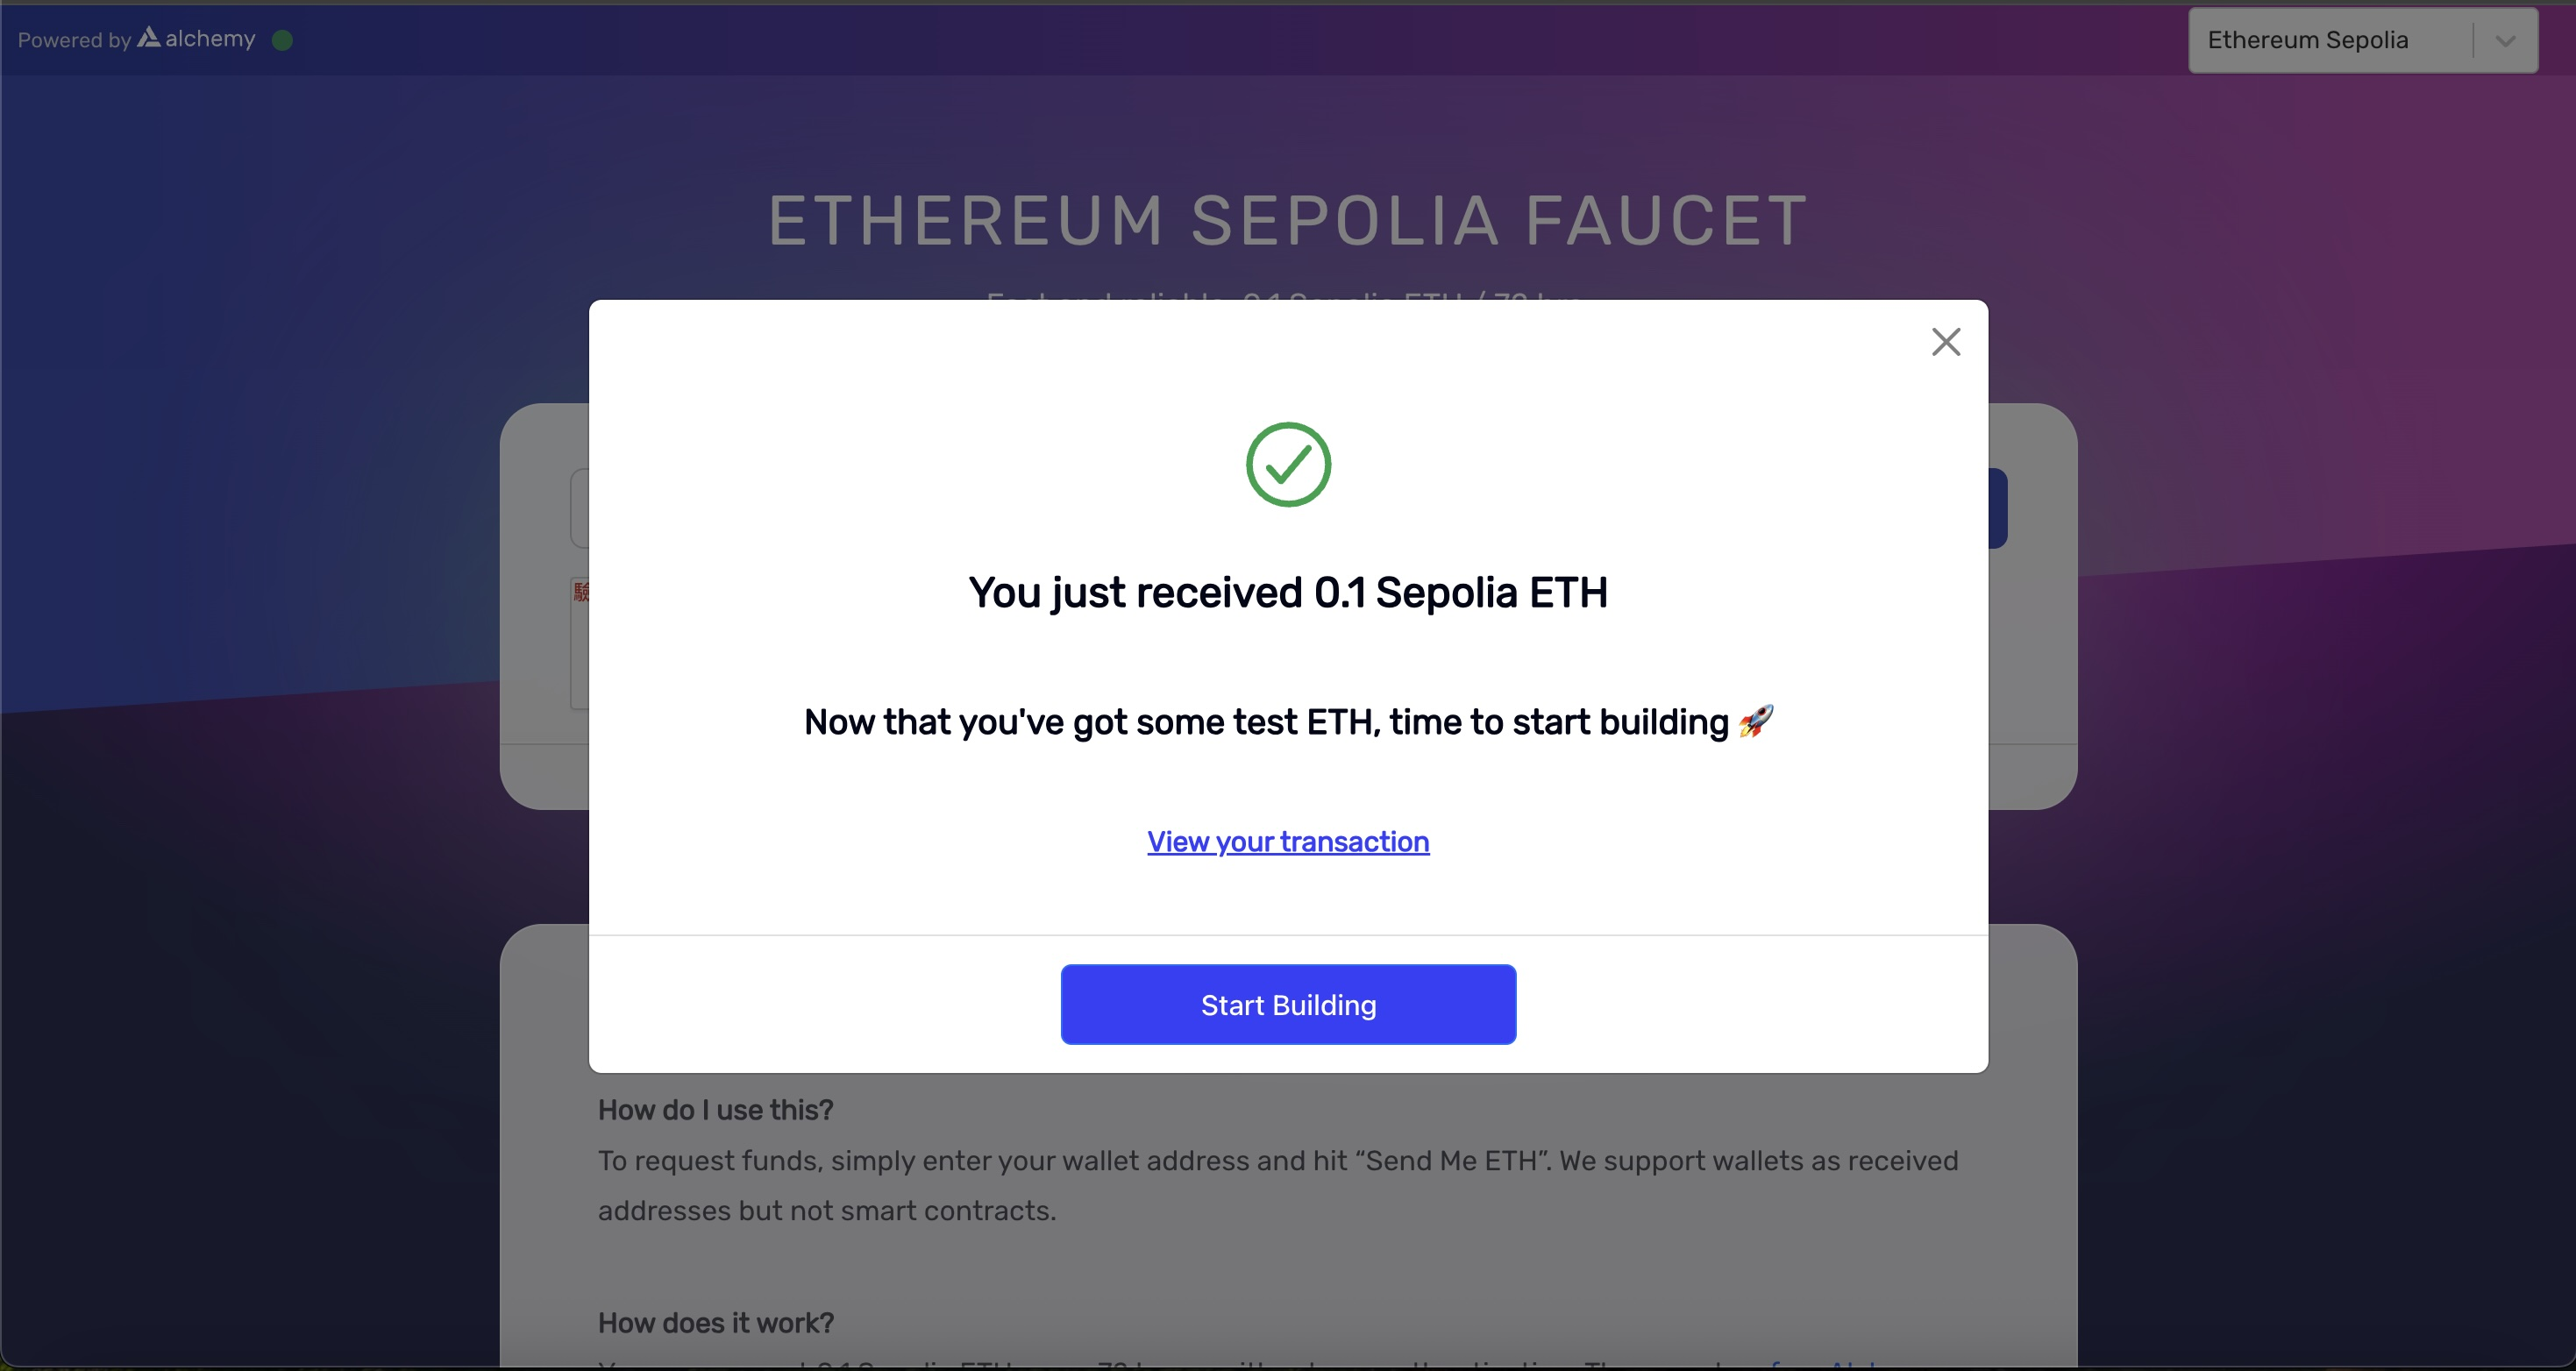

https://sepolia.etherscan.io/tx/0x1b6f495b5a8cfc0fb43e01f19ec1c245504637014f7c237a80fe81aab699f5a9

• ETH 線上編輯器- https://remix.ethereum.org

• NQU Meta 智能合約範例- https://github.com/ccwu0918/nqu_meta/blob/master/contracts/nqu_meta_nft.sol

• Nic Meta 智能合約範例- https://github.com/niclin/nic_meta/blob/master/contracts/nic_meta_nft.sol

In [ ]:
# @title
// Contract based on https://docs.openzeppelin.com/contracts/3.x/erc721
// SPDX-License-Identifier: MIT
pragma solidity ^0.8.0;

import "@openzeppelin/contracts/token/ERC721/extensions/ERC721Enumerable.sol";
import "@openzeppelin/contracts/access/Ownable.sol";
import "@openzeppelin/contracts/utils/Strings.sol";

contract NquMeta is ERC721Enumerable, Ownable {
    using Strings for uint256;

    bool public _isSaleActive = false;
    bool public _revealed = false;

    // Constants
    uint256 public constant MAX_SUPPLY = 10;
    uint256 public mintPrice = 0.001 ether;
    uint256 public maxBalance = 1;
    uint256 public maxMint = 1;

    string baseURI;
    string public notRevealedUri;
    string public baseExtension = ".json";

    mapping(uint256 => string) private _tokenURIs;

    constructor(string memory initBaseURI, string memory initNotRevealedUri)
        ERC721("NQU Meta", "NQUCoin")
        Ownable(msg.sender) // <-- Add this line
    {
        setBaseURI(initBaseURI);
        setNotRevealedURI(initNotRevealedUri);
    }

    function mintNquMeta(uint256 tokenQuantity) public payable {
        require(
            totalSupply() + tokenQuantity <= MAX_SUPPLY,
            "Sale would exceed max supply"
        );
        require(_isSaleActive, "Sale must be active to mint NQU Metas");
        require(
            balanceOf(msg.sender) + tokenQuantity <= maxBalance,
            "Sale would exceed max balance"
        );
        require(
            tokenQuantity * mintPrice <= msg.value,
            "Not enough ether sent"
        );
        require(tokenQuantity <= maxMint, "Can only mint 1 tokens at a time");

        _mintNquMeta(tokenQuantity);
    }

    function _mintNquMeta(uint256 tokenQuantity) internal {
        for (uint256 i = 0; i < tokenQuantity; i++) {
            uint256 mintIndex = totalSupply();
            if (totalSupply() < MAX_SUPPLY) {
                _safeMint(msg.sender, mintIndex);
            }
        }
    }

    function tokenURI(uint256 tokenId)
        public
        view
        virtual
        override
        returns (string memory)
    {
        require(
            _ownerOf(tokenId) != address(0),
            "ERC721Metadata: URI query for nonexistent token"
        );

        if (_revealed == false) {
            return notRevealedUri;
        }

        string memory _tokenURI = _tokenURIs[tokenId];
        string memory base = _baseURI();

        // If there is no base URI, return the token URI.
        if (bytes(base).length == 0) {
            return _tokenURI;
        }
        // If both are set, concatenate the baseURI and tokenURI (via abi.encodePacked).
        if (bytes(_tokenURI).length > 0) {
            return string(abi.encodePacked(base, _tokenURI));
        }
        // If there is a baseURI but no tokenURI, concatenate the tokenID to the baseURI.
        return
            string(abi.encodePacked(base, tokenId.toString(), baseExtension));
    }

    // internal
    function _baseURI() internal view virtual override returns (string memory) {
        return baseURI;
    }

    //only owner
    function flipSaleActive() public onlyOwner {
        _isSaleActive = !_isSaleActive;
    }

    function flipReveal() public onlyOwner {
        _revealed = !_revealed;
    }

    function setMintPrice(uint256 _mintPrice) public onlyOwner {
        mintPrice = _mintPrice;
    }

    function setNotRevealedURI(string memory _notRevealedURI) public onlyOwner {
        notRevealedUri = _notRevealedURI;
    }

    function setBaseURI(string memory _newBaseURI) public onlyOwner {
        baseURI = _newBaseURI;
    }

    function setBaseExtension(string memory _newBaseExtension)
        public
        onlyOwner
    {
        baseExtension = _newBaseExtension;
    }

    function setMaxBalance(uint256 _maxBalance) public onlyOwner {
        maxBalance = _maxBalance;
    }

    function setMaxMint(uint256 _maxMint) public onlyOwner {
        maxMint = _maxMint;
    }

    function withdraw(address to) public onlyOwner {
        uint256 balance = address(this).balance;
        payable(to).transfer(balance);
    }
}

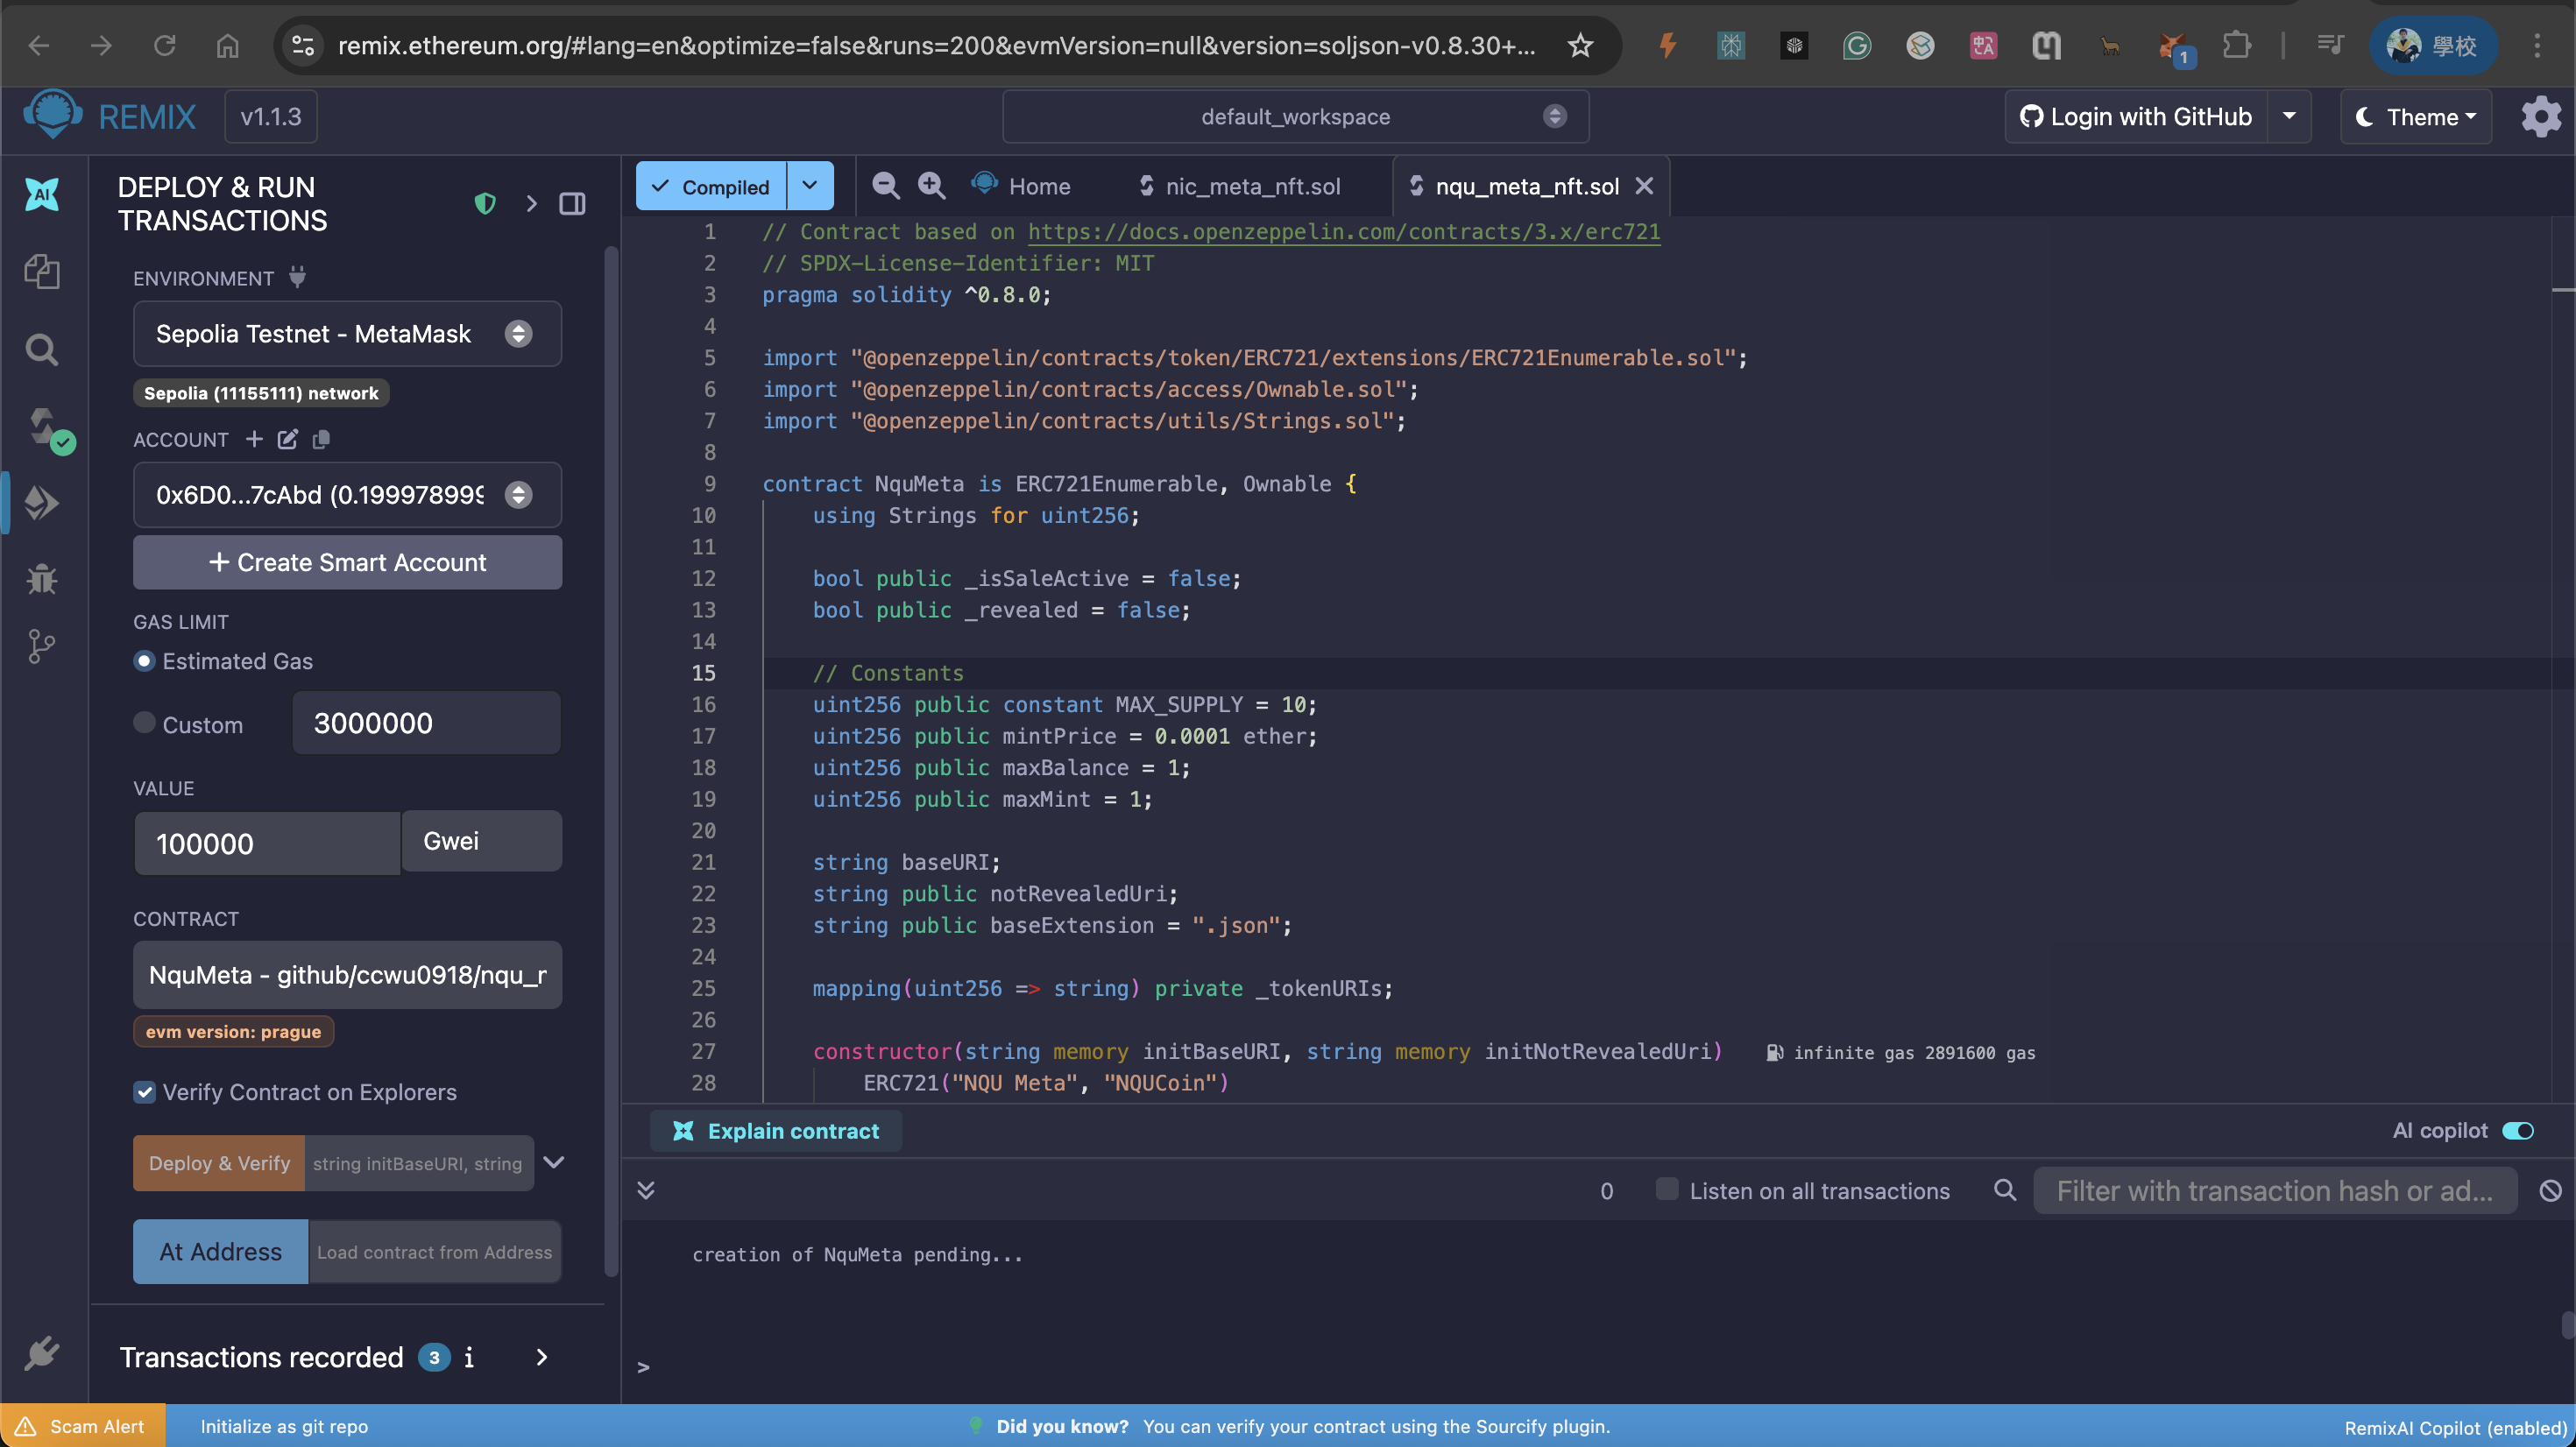

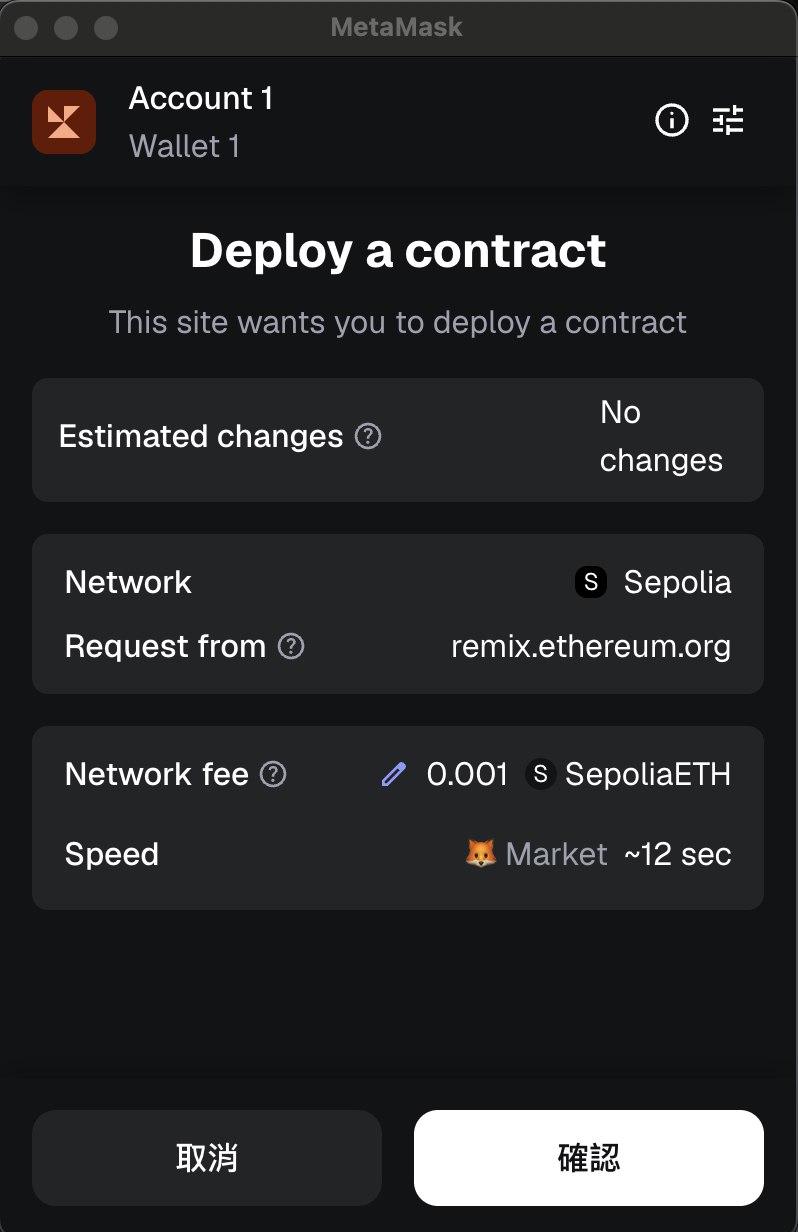

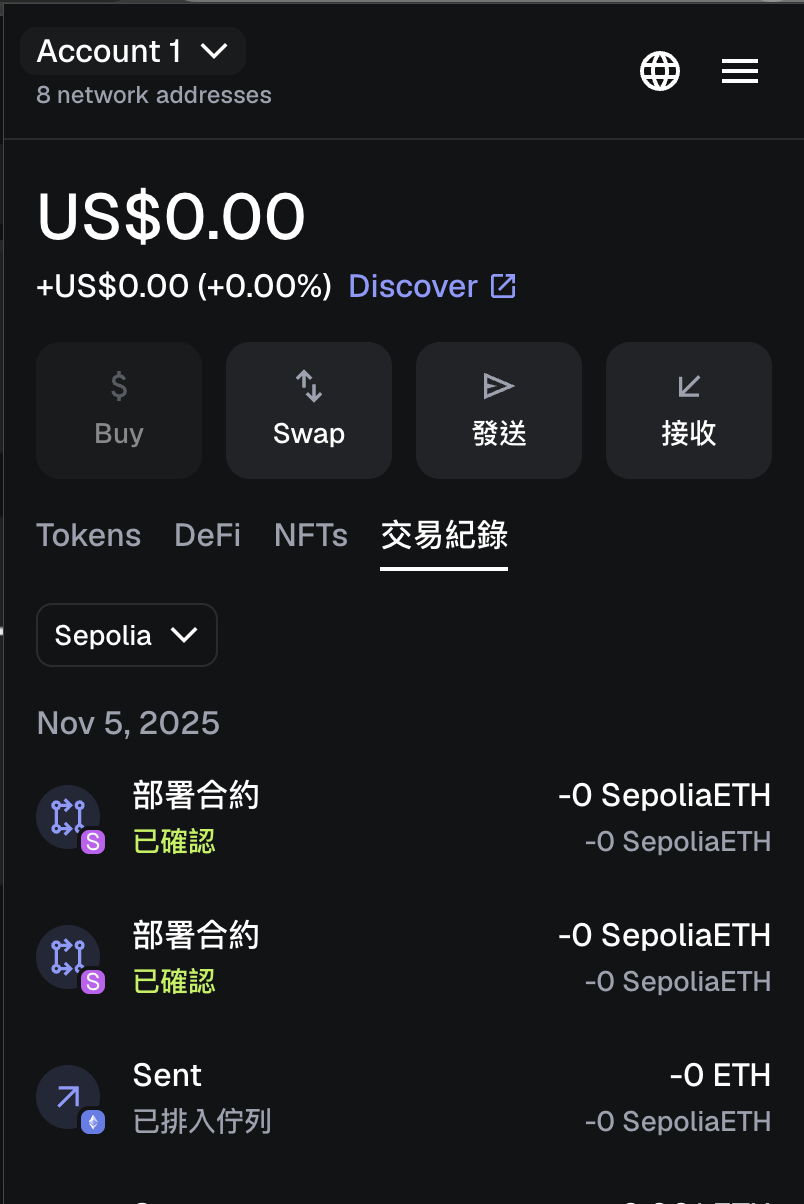

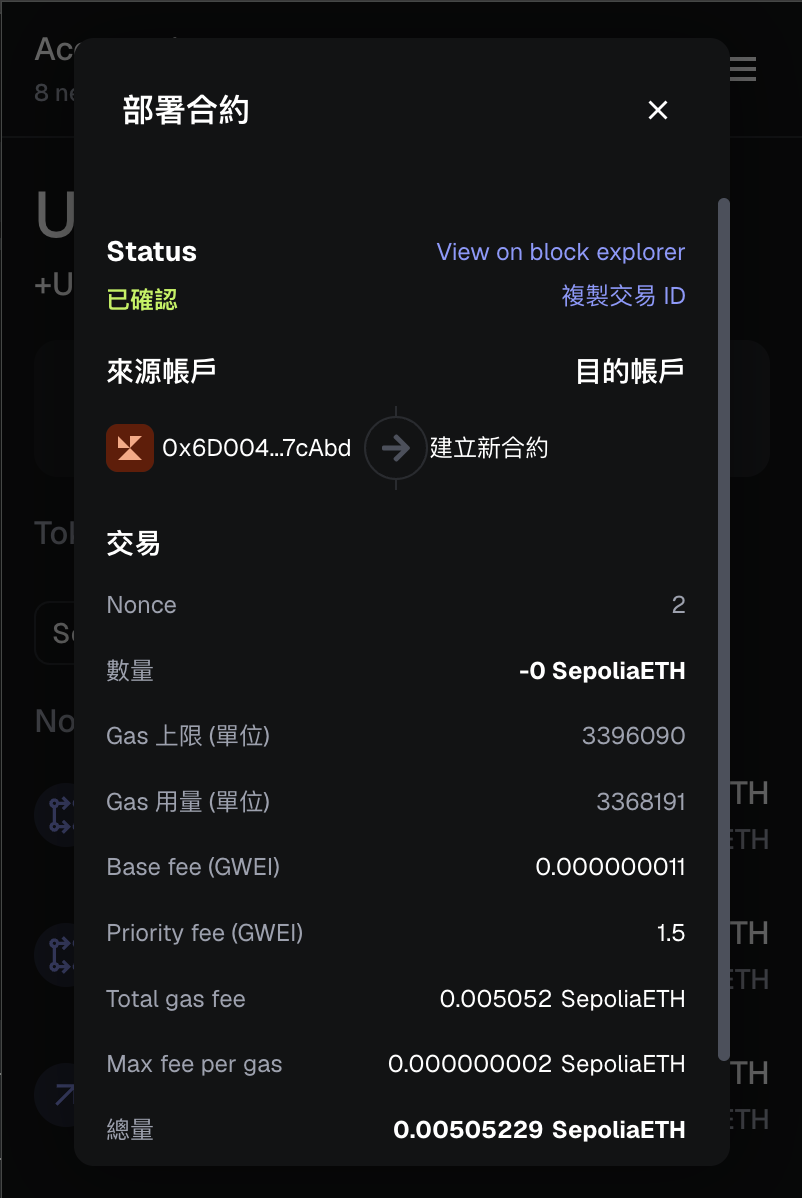

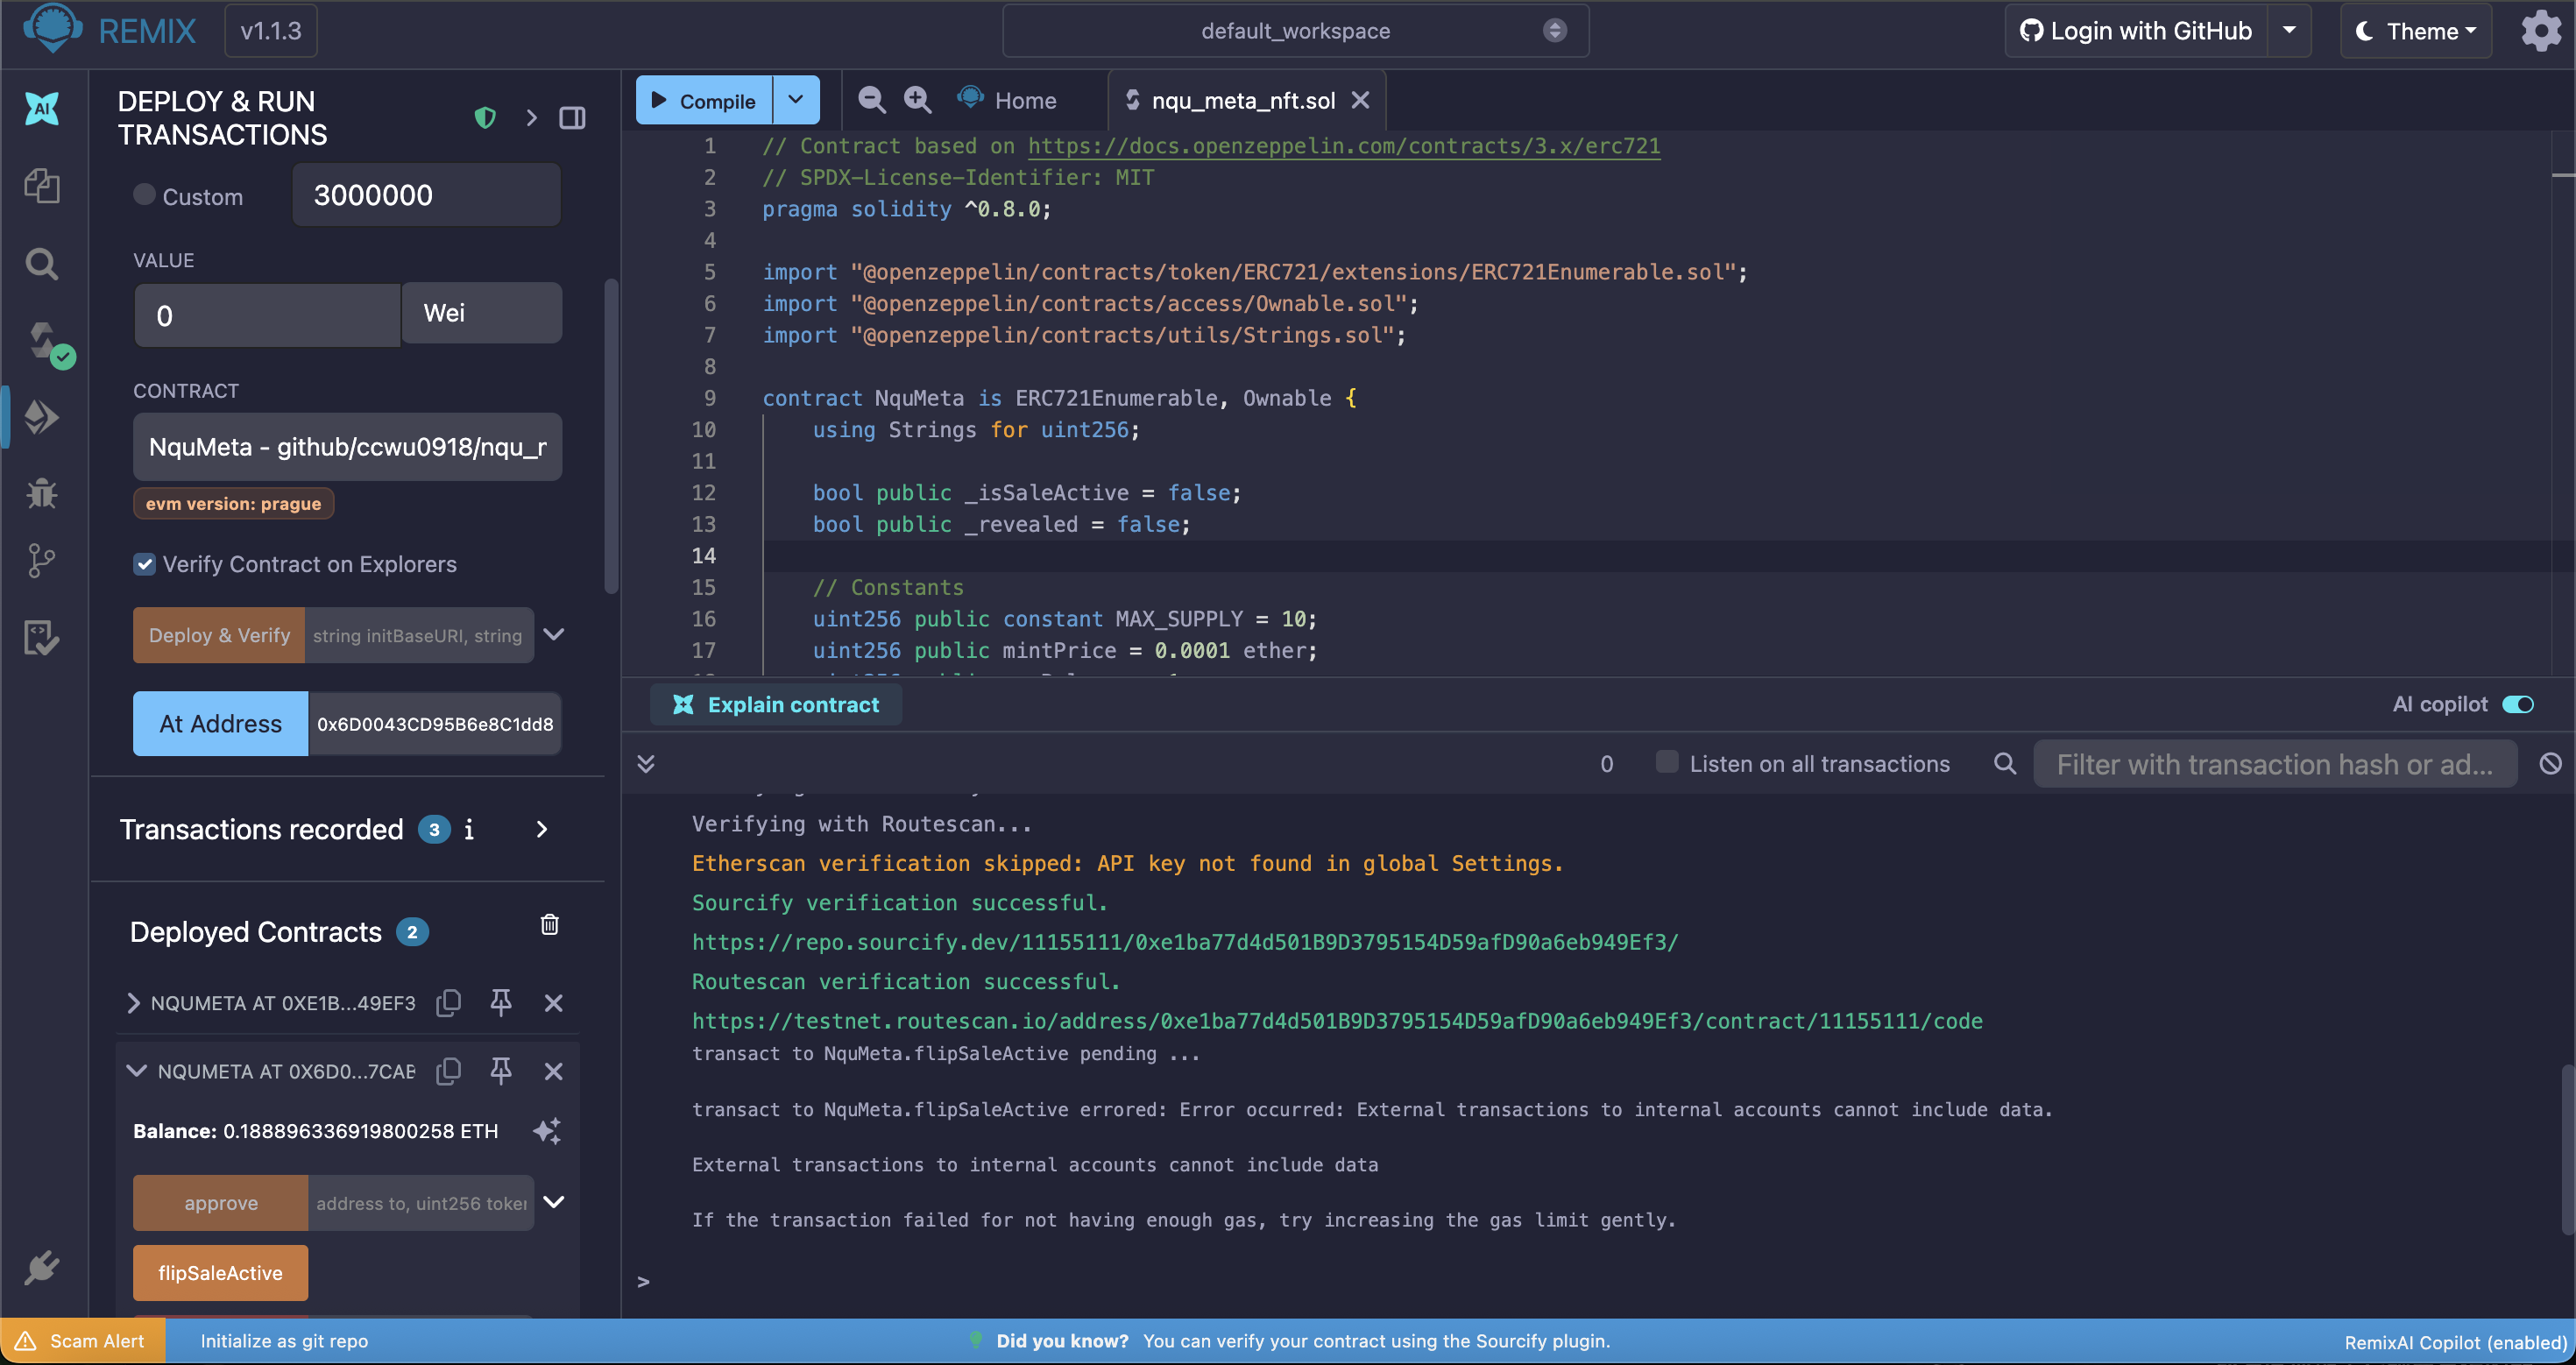

• ETH 轉Gwei - https://eth-converter.com

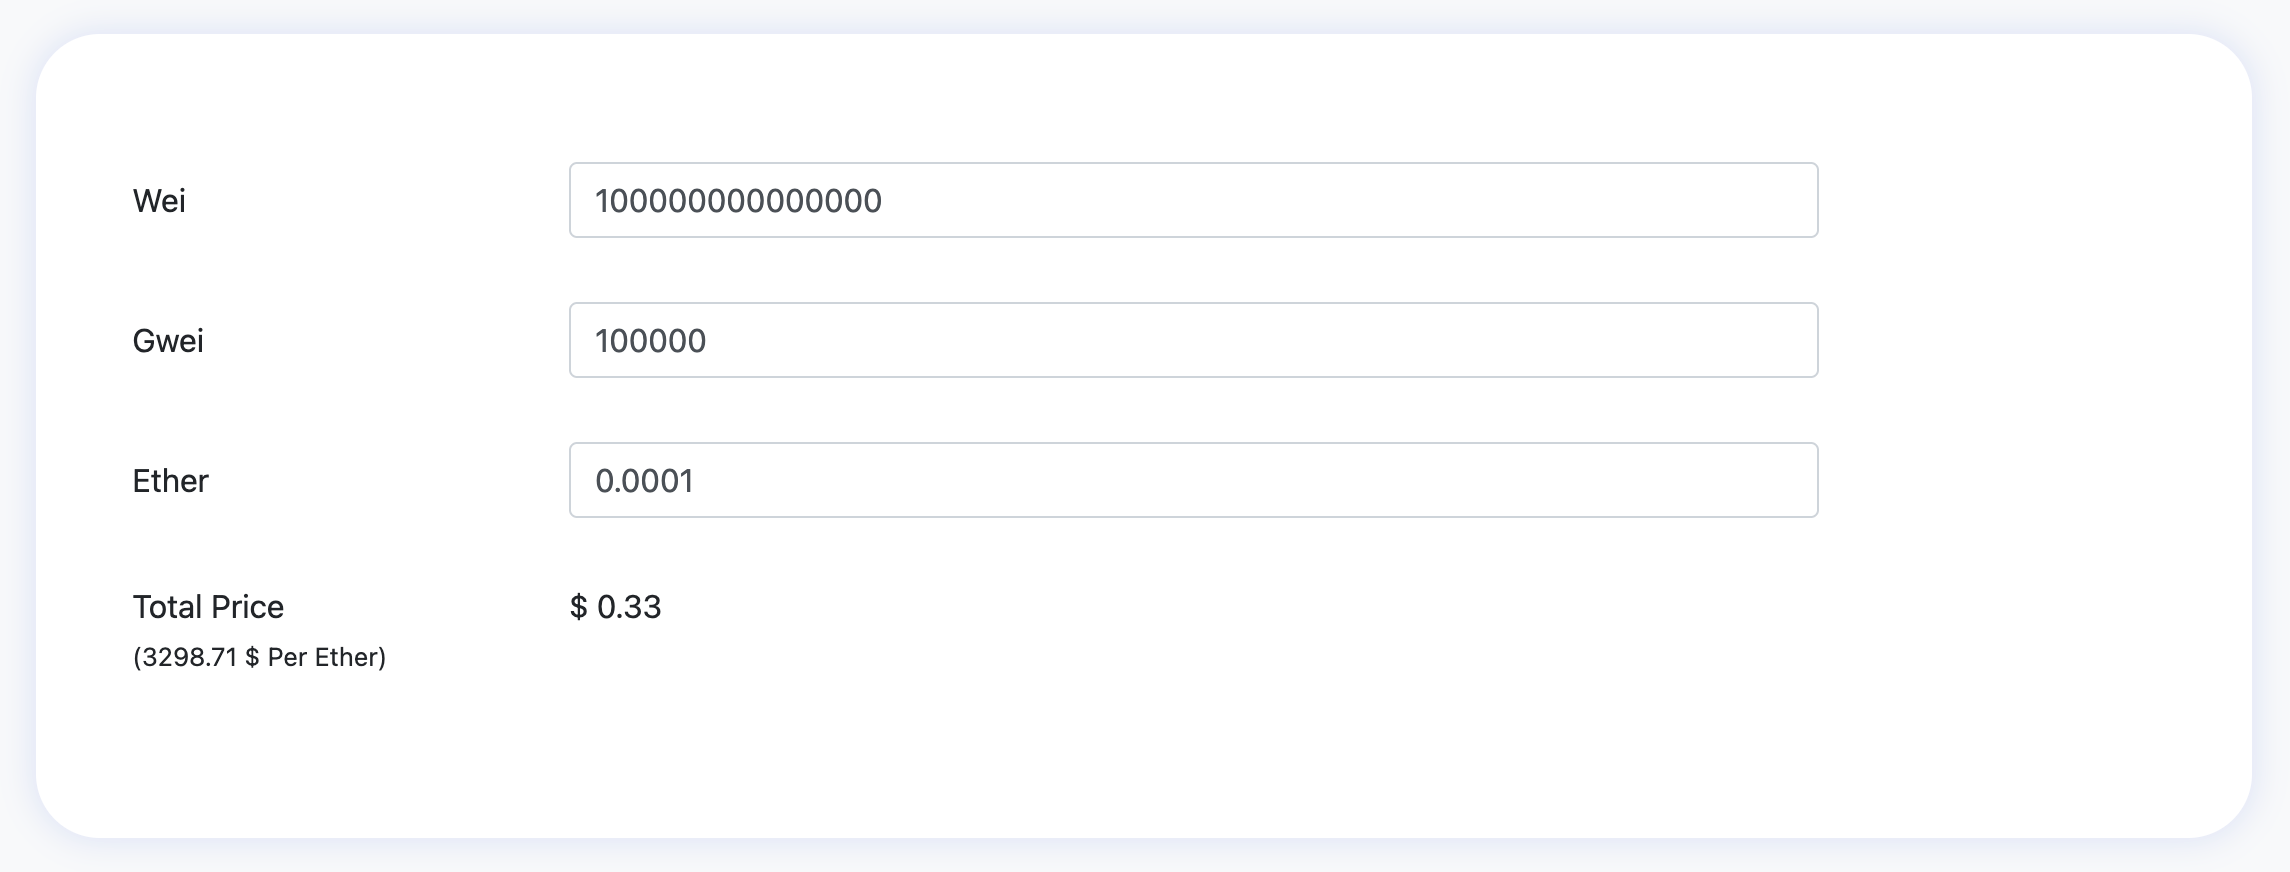

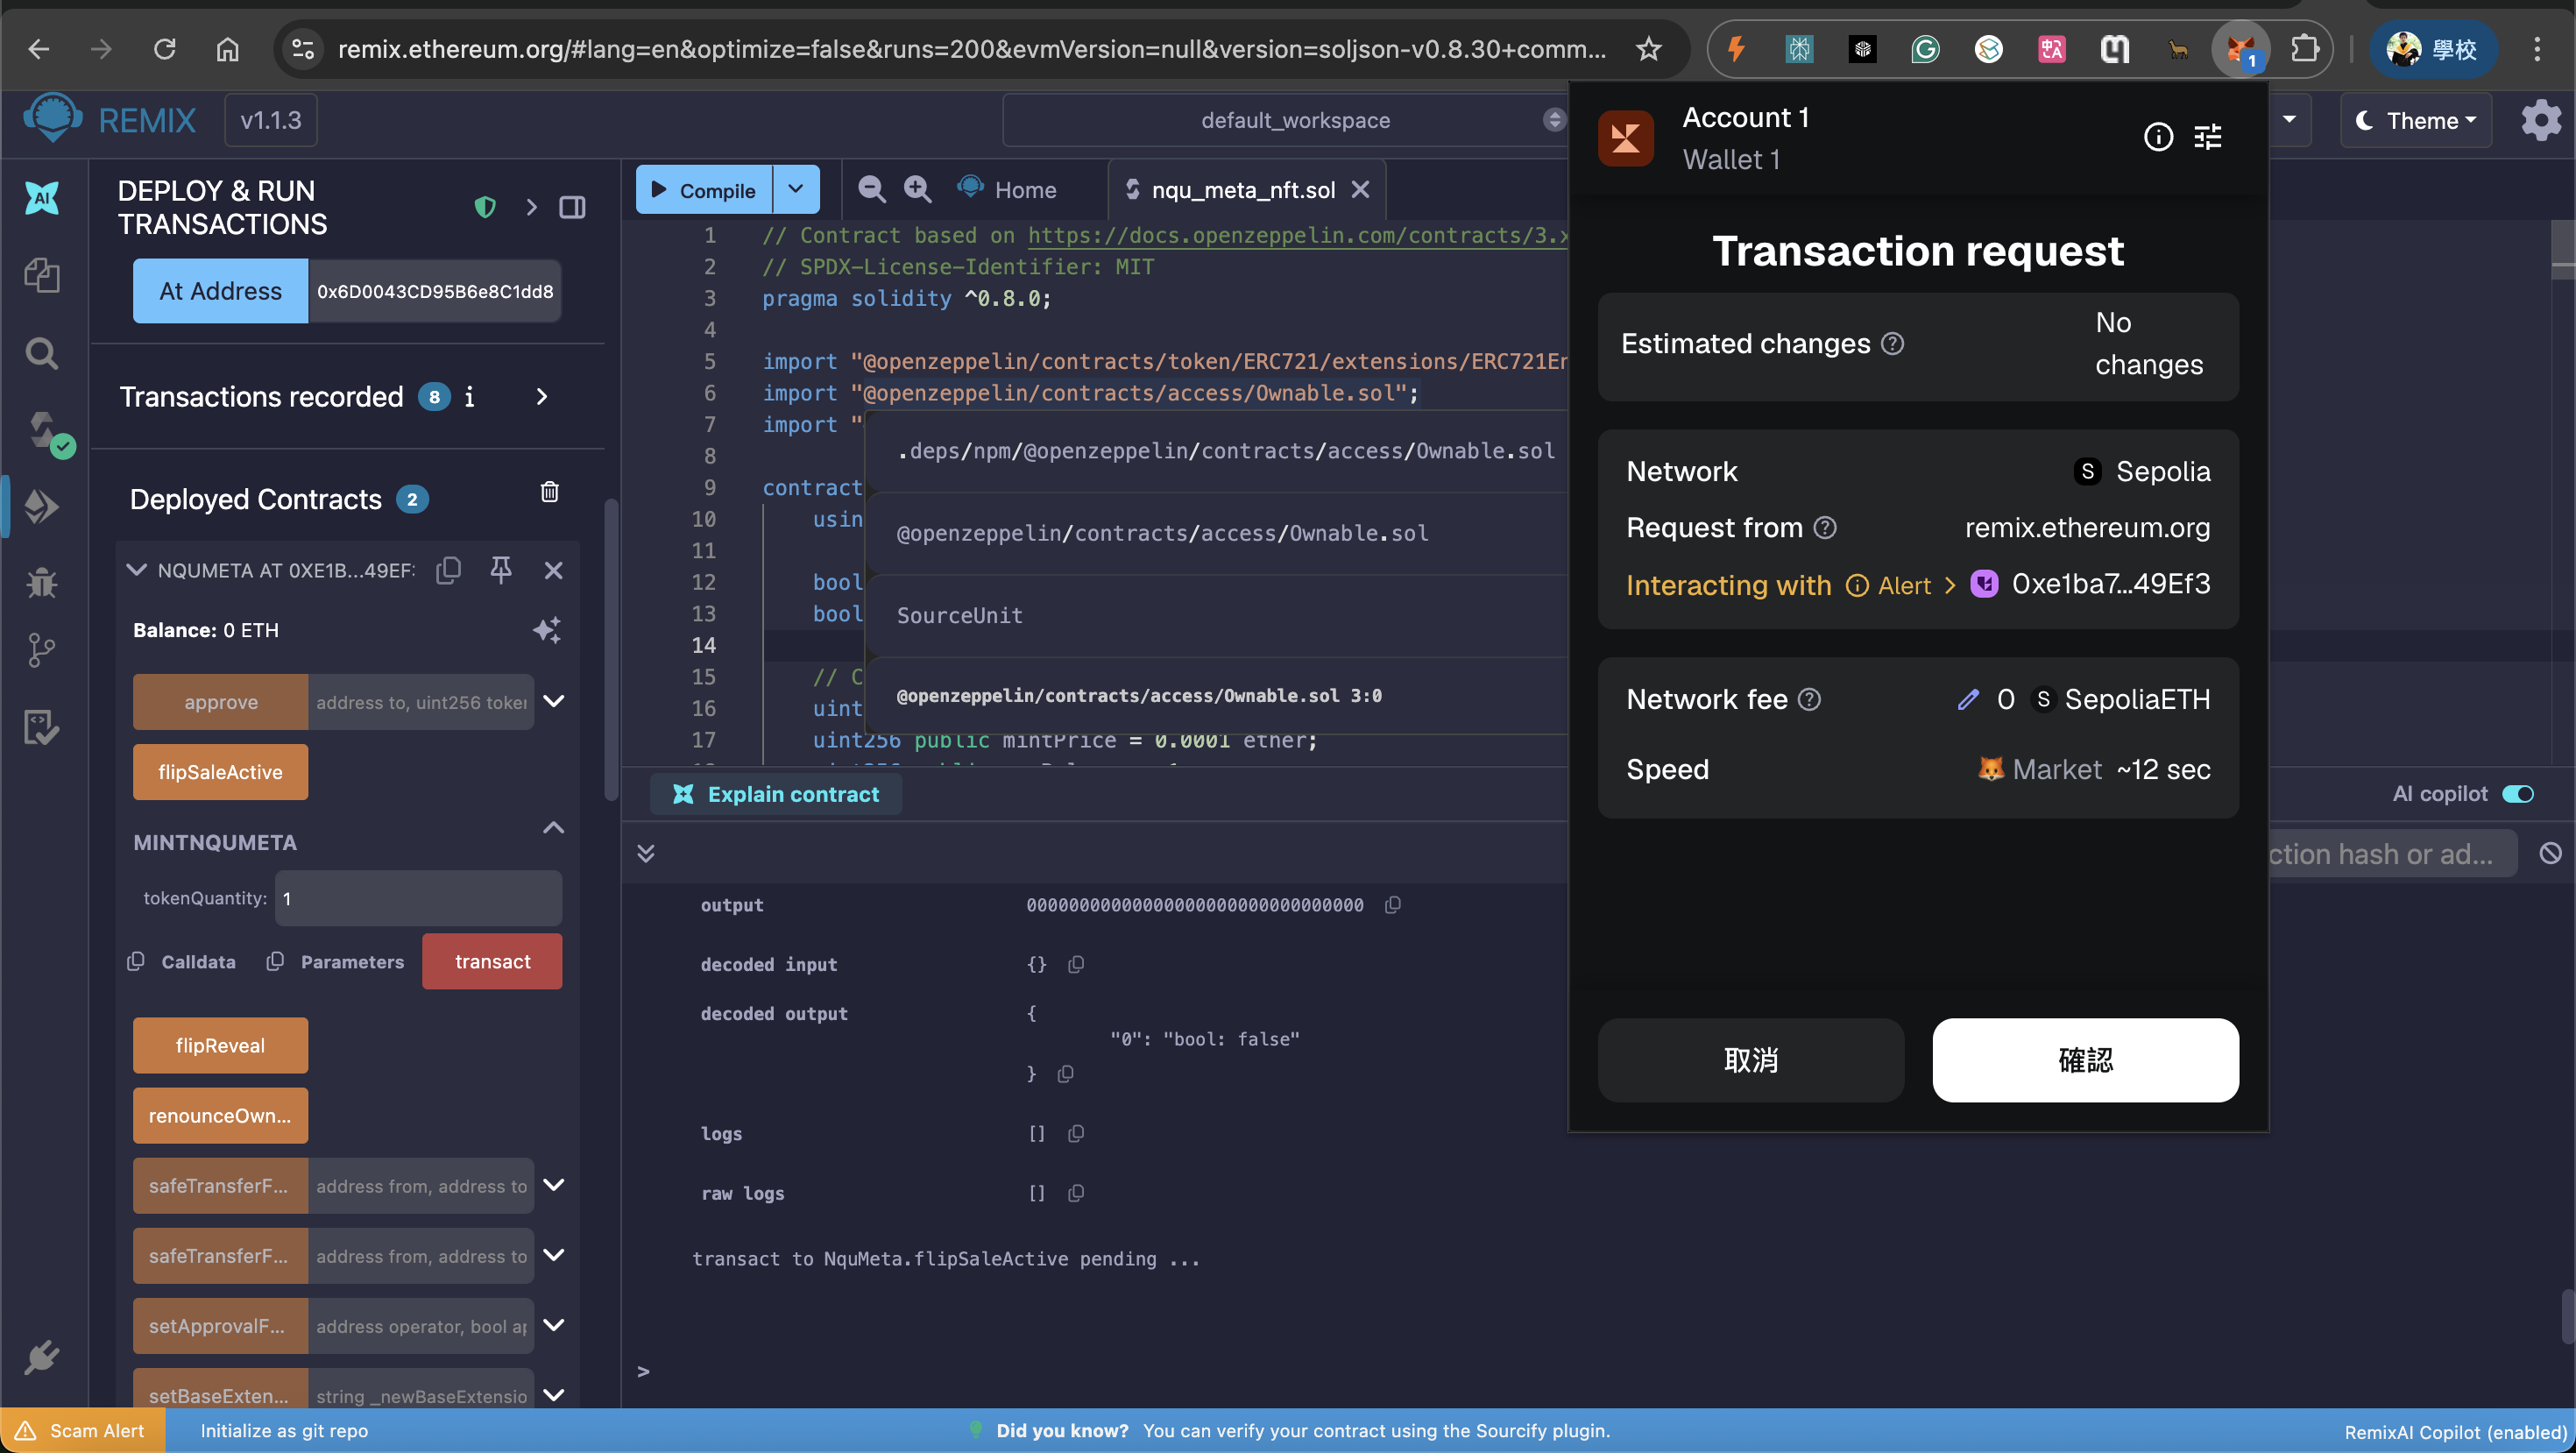

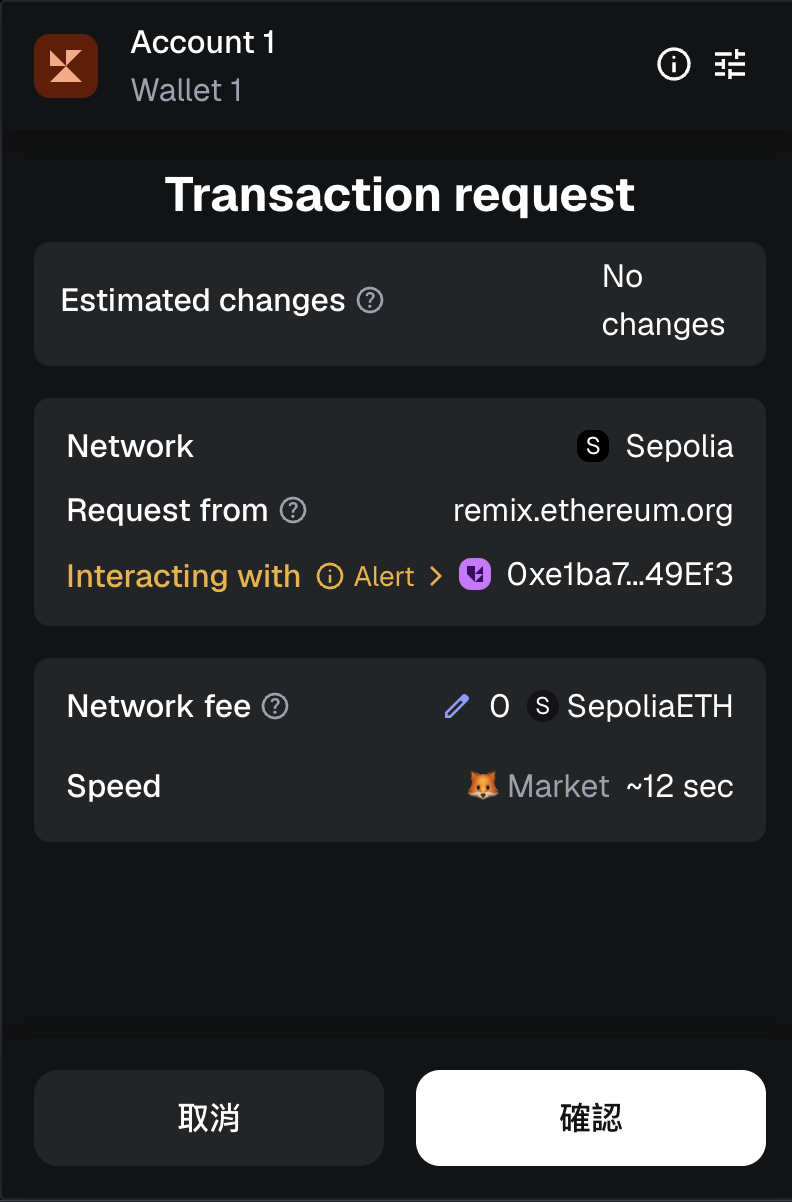

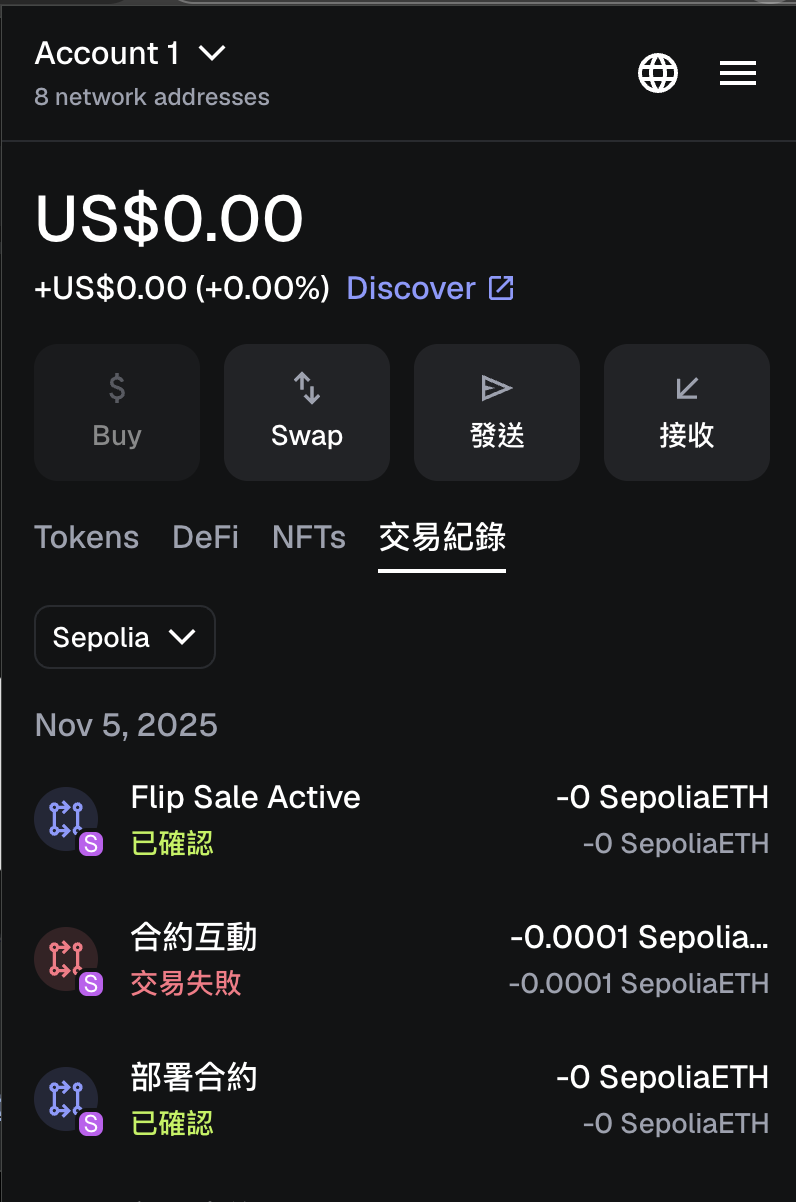

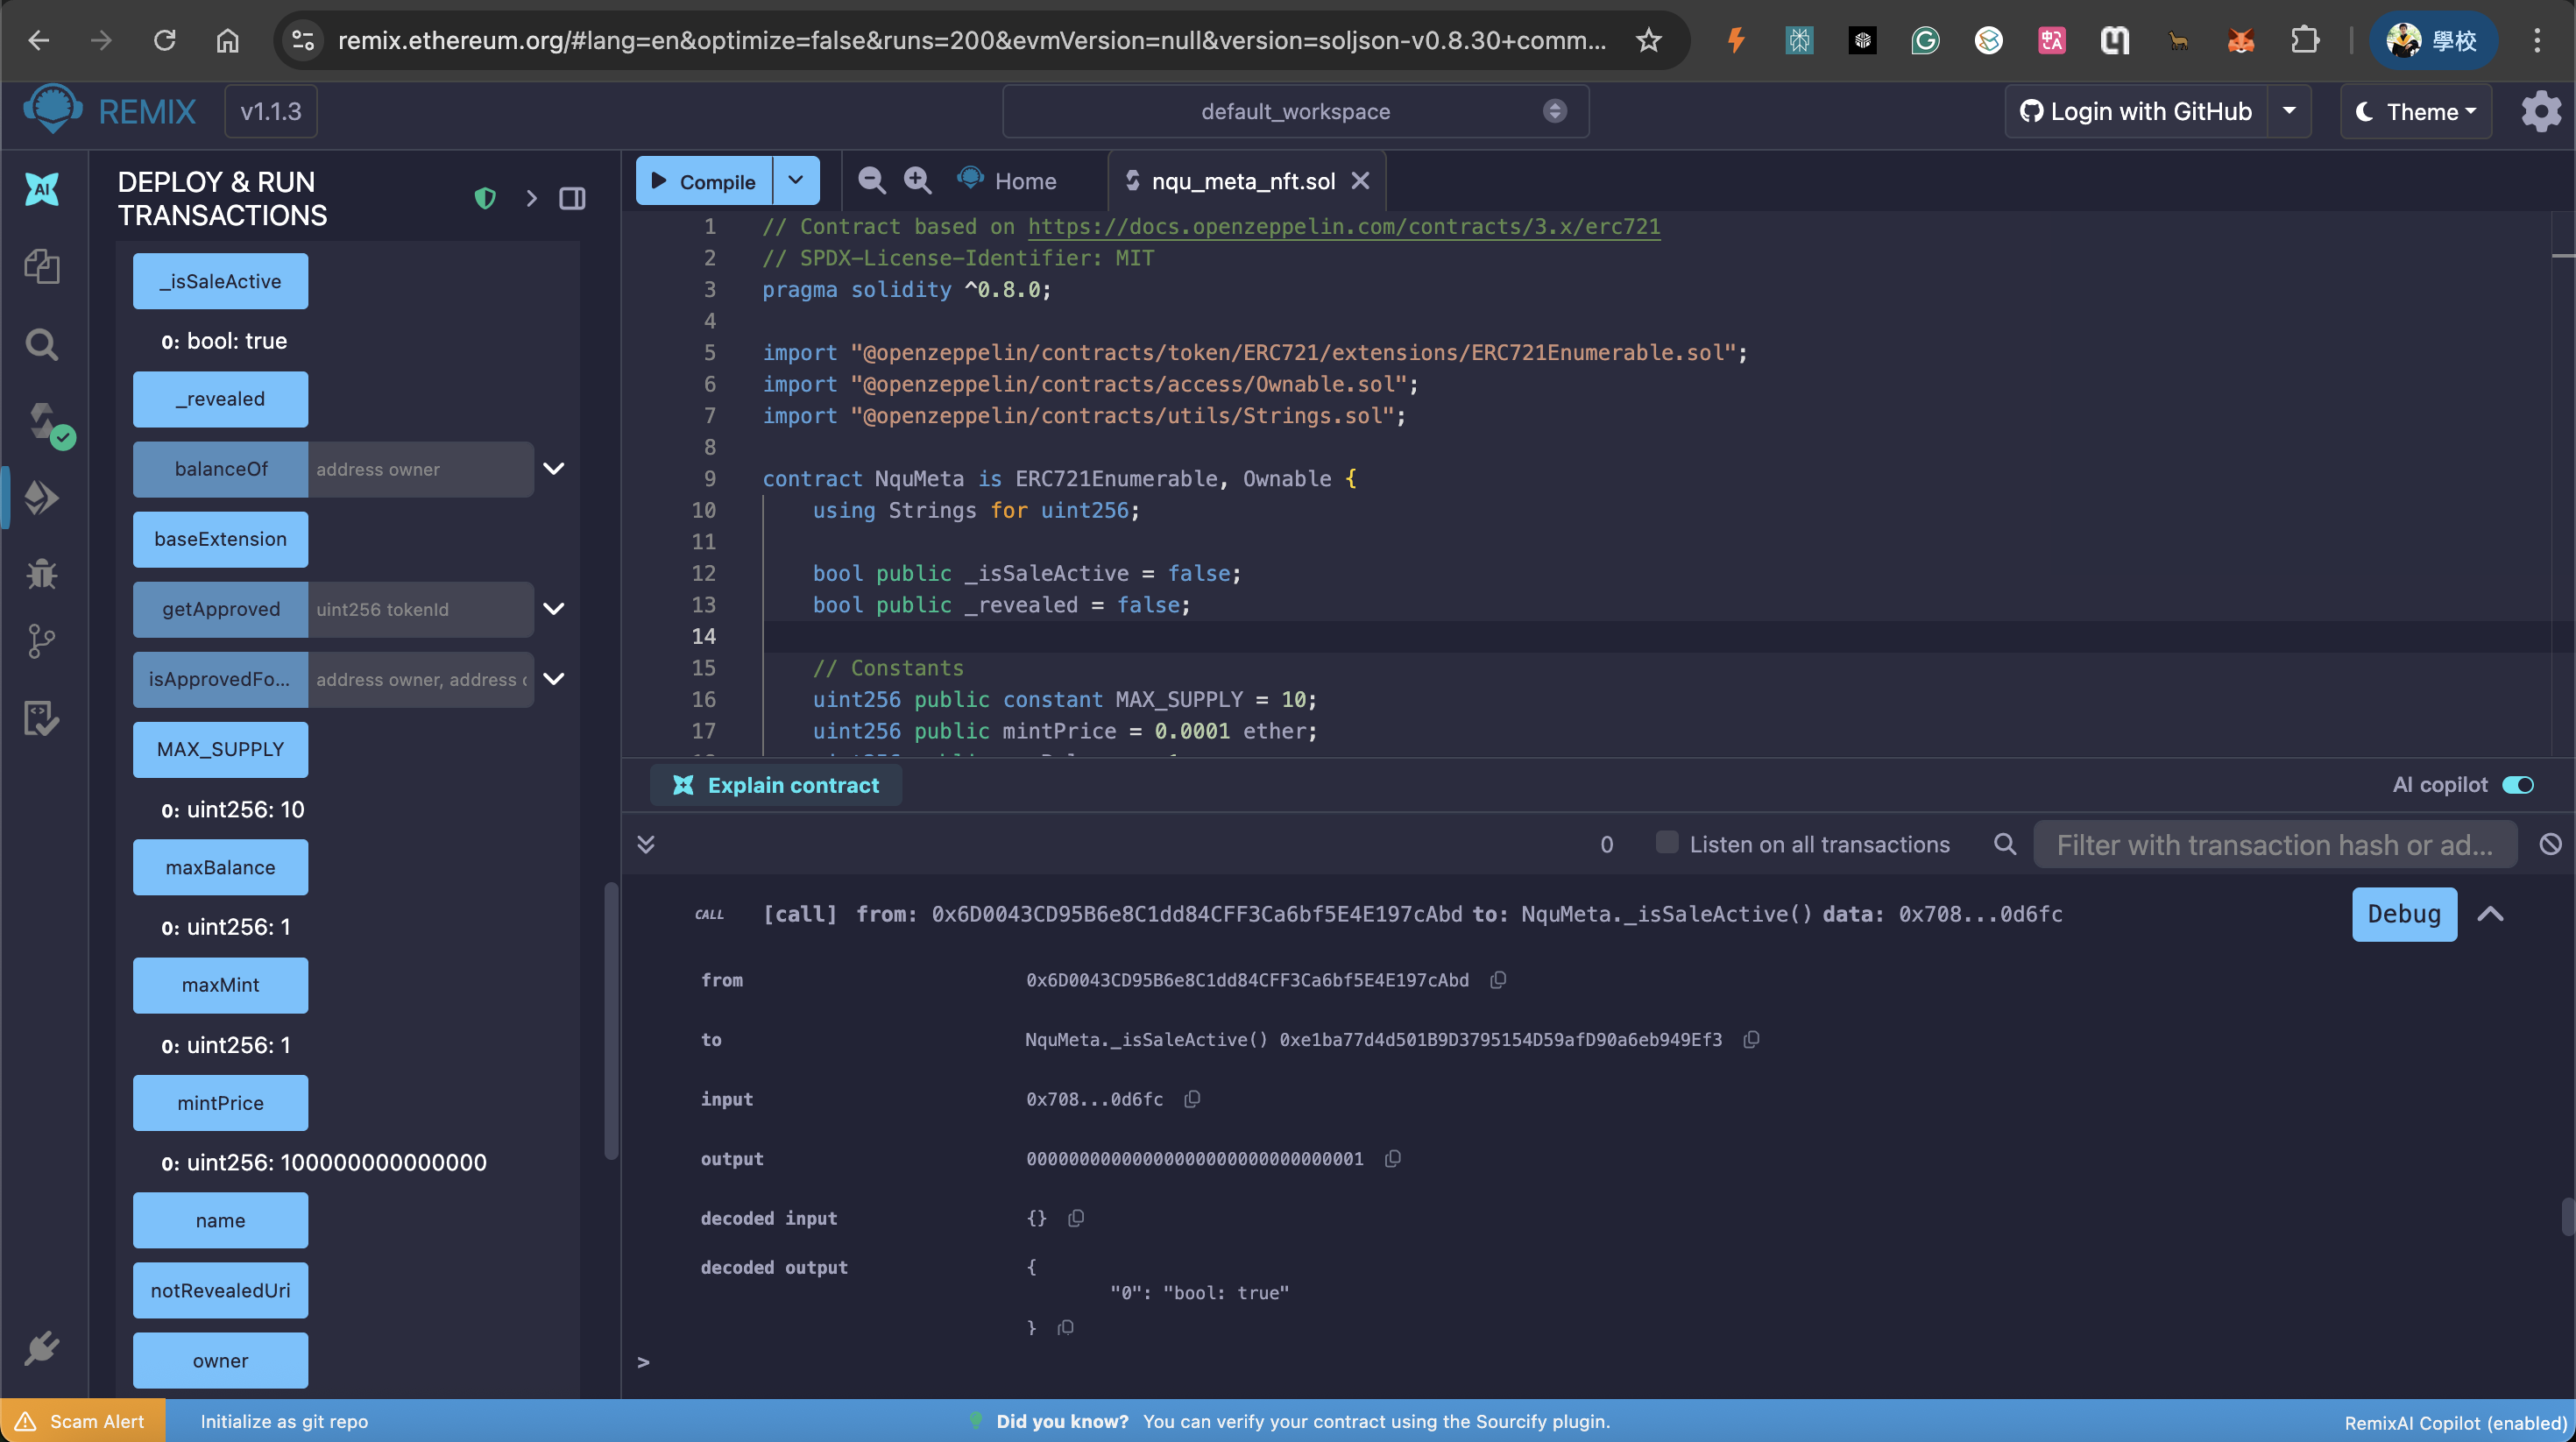

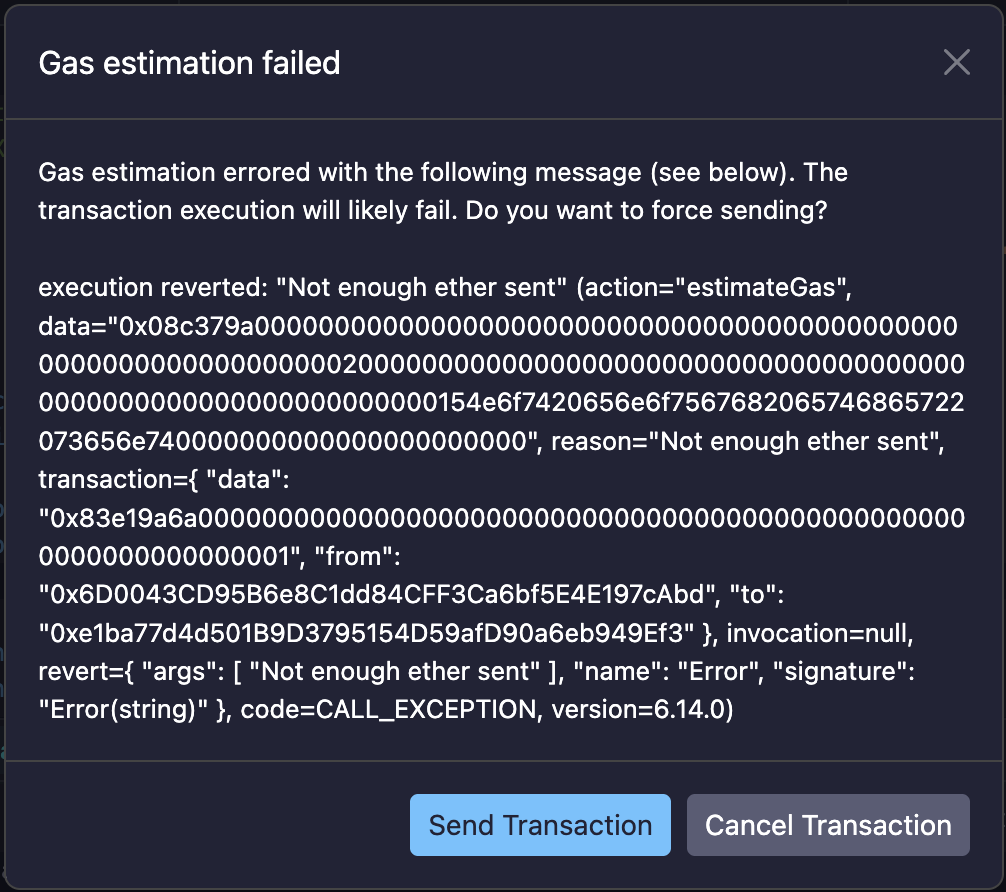

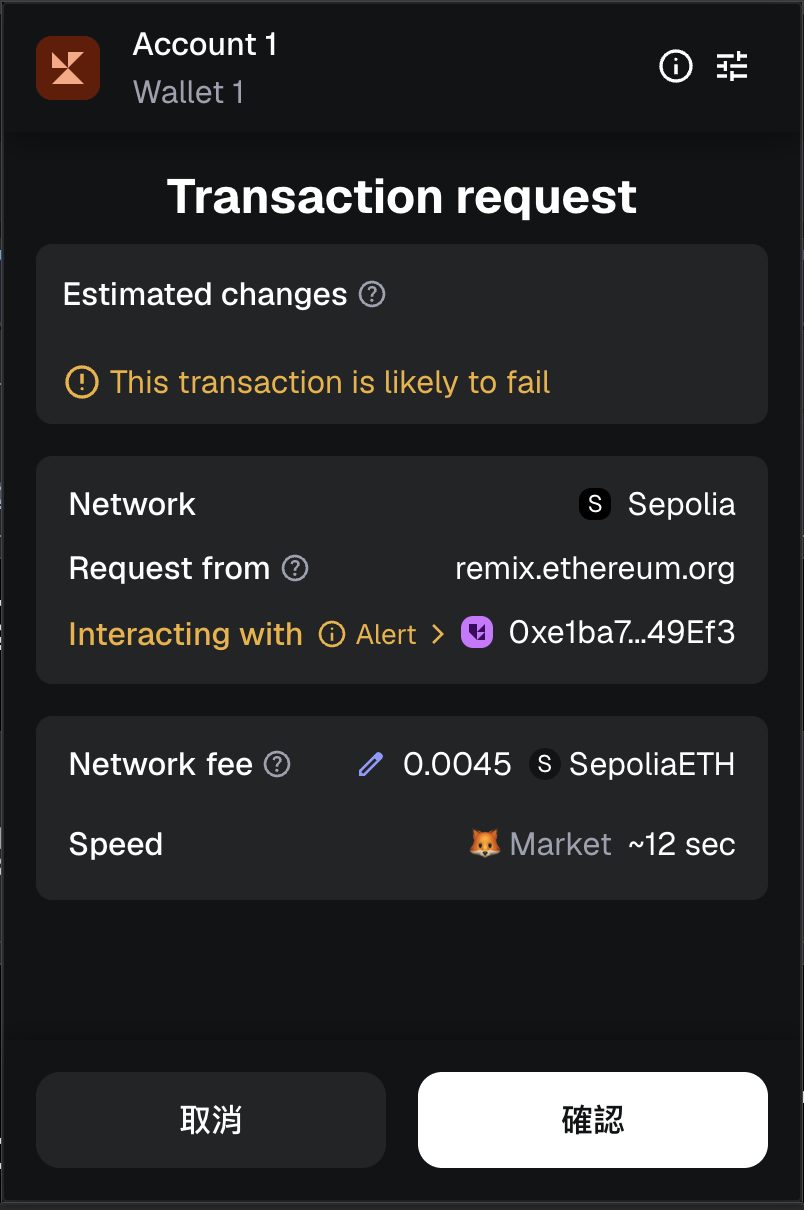

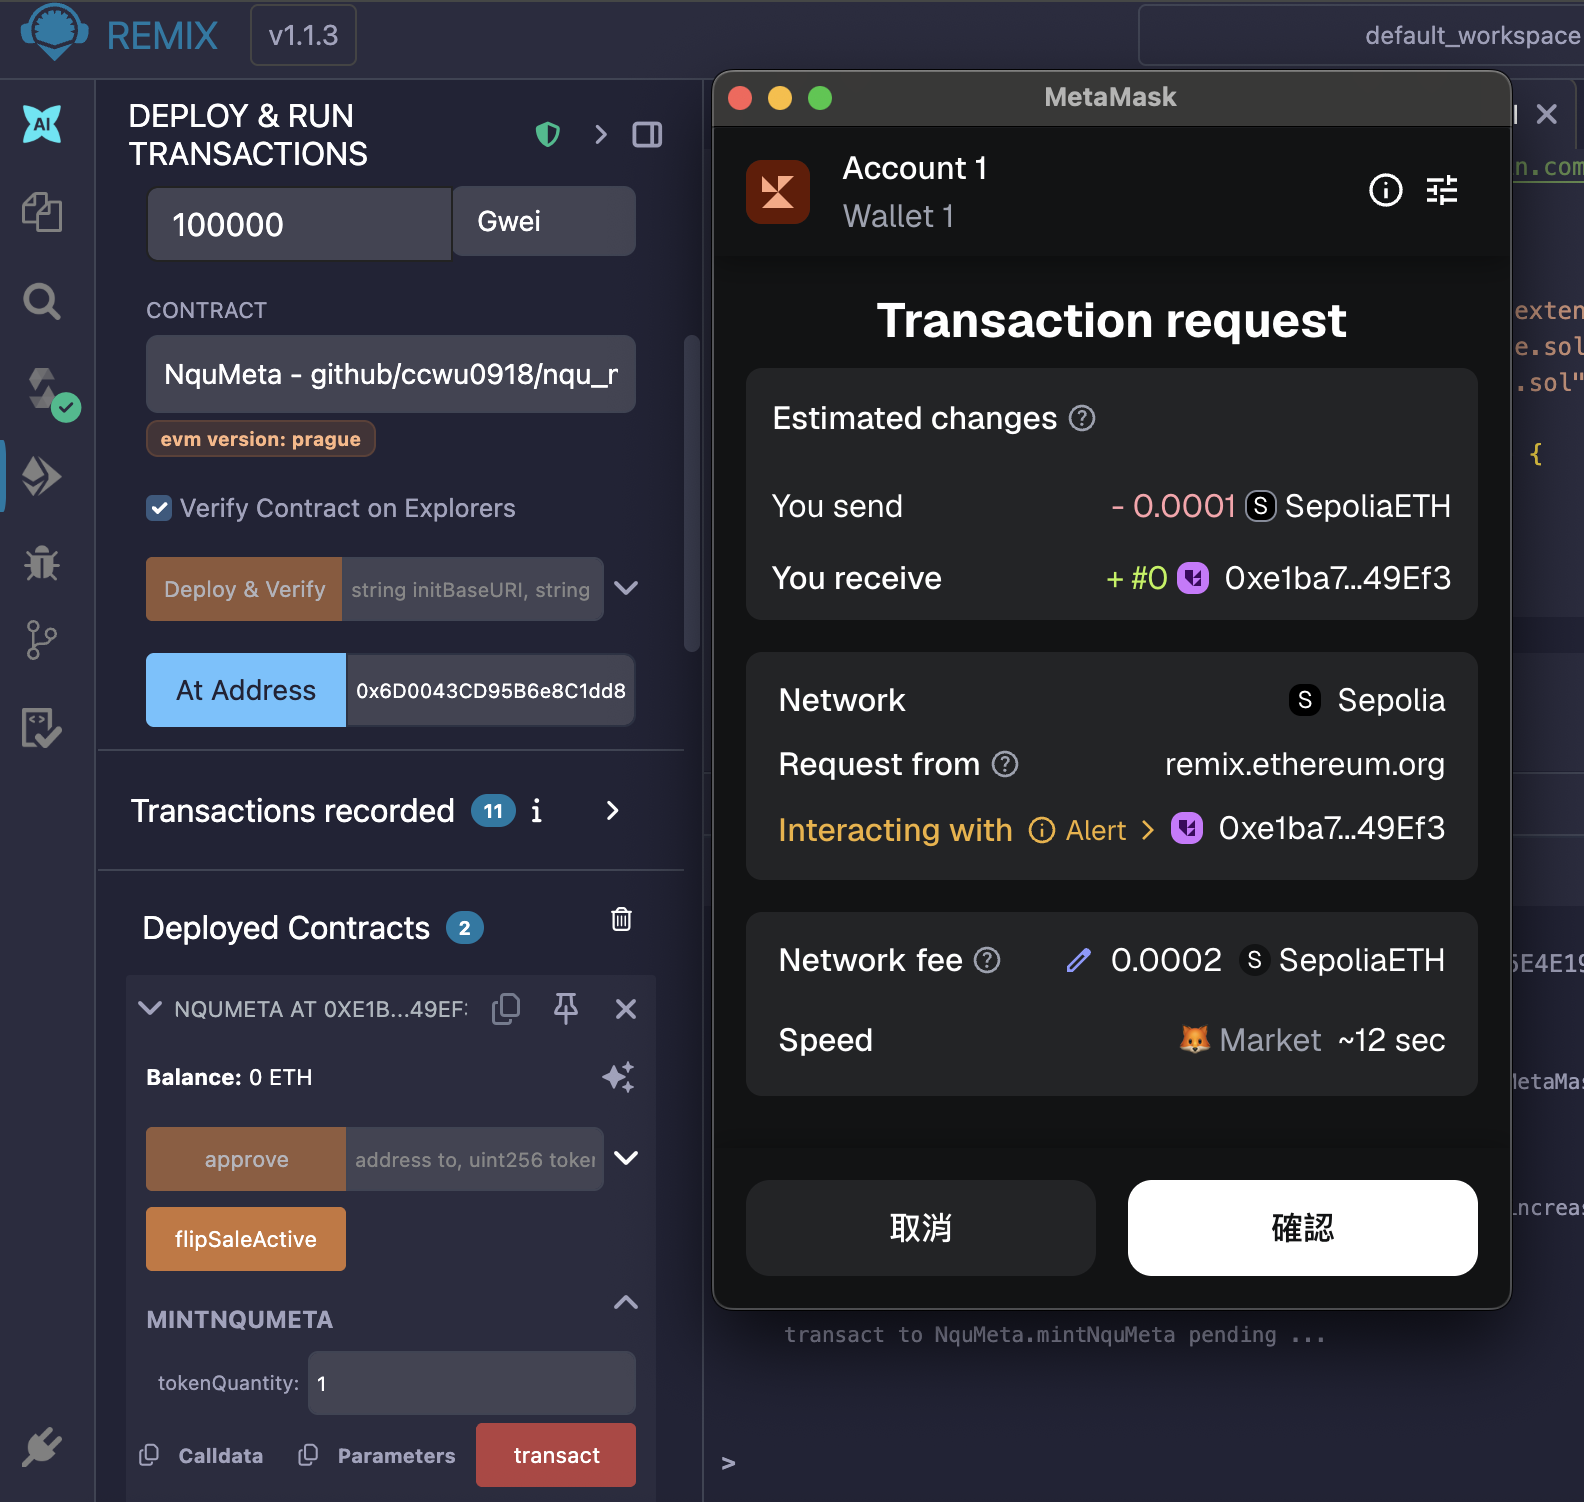

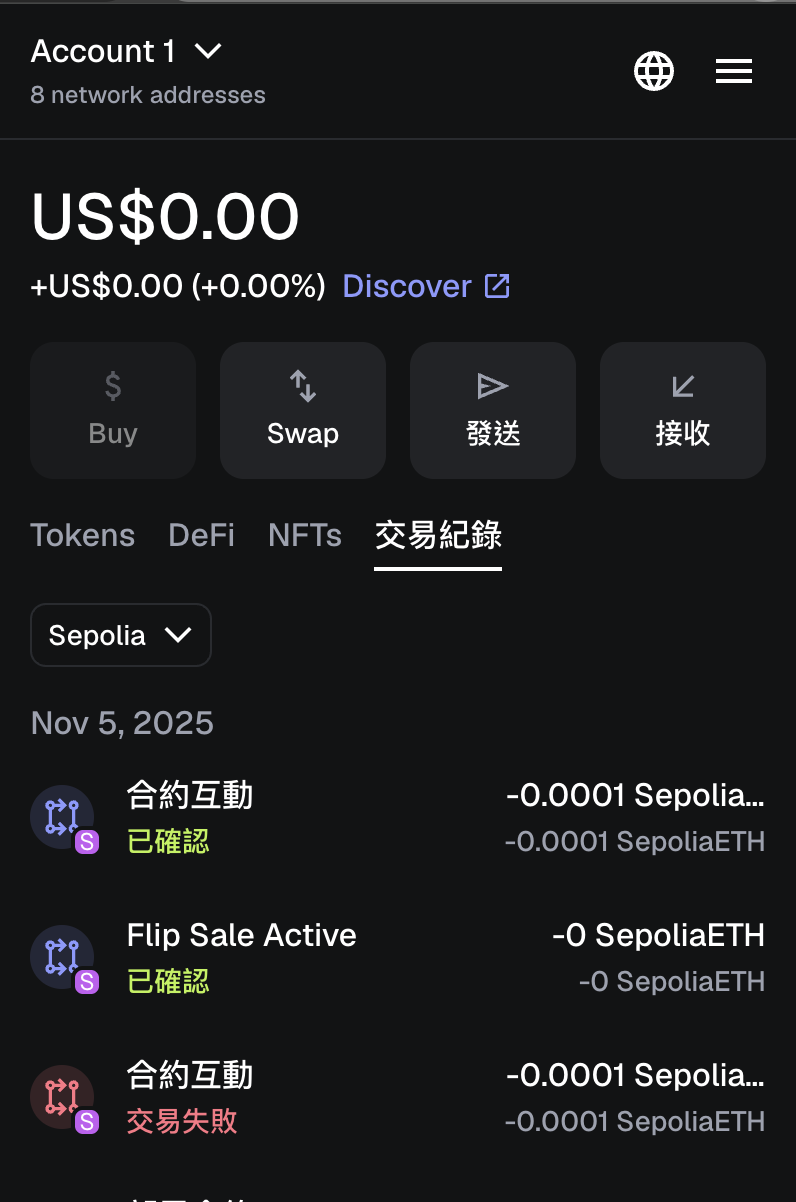

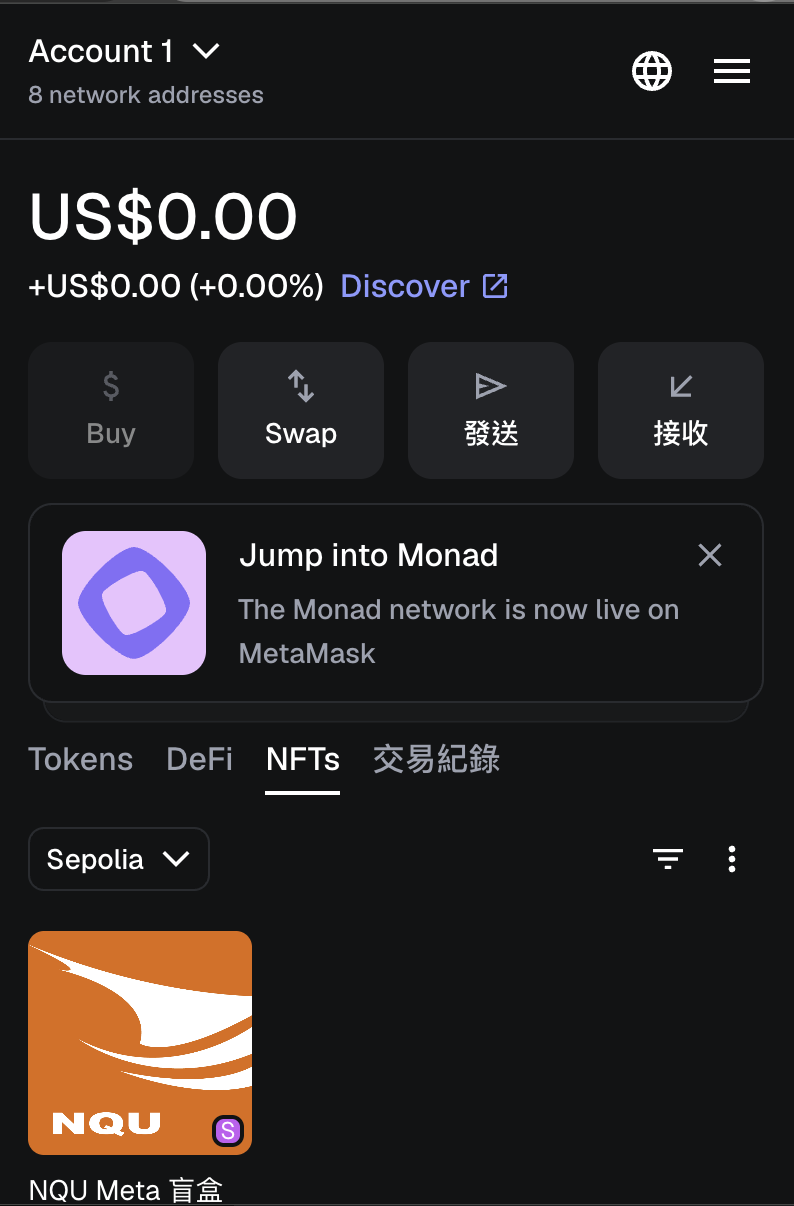

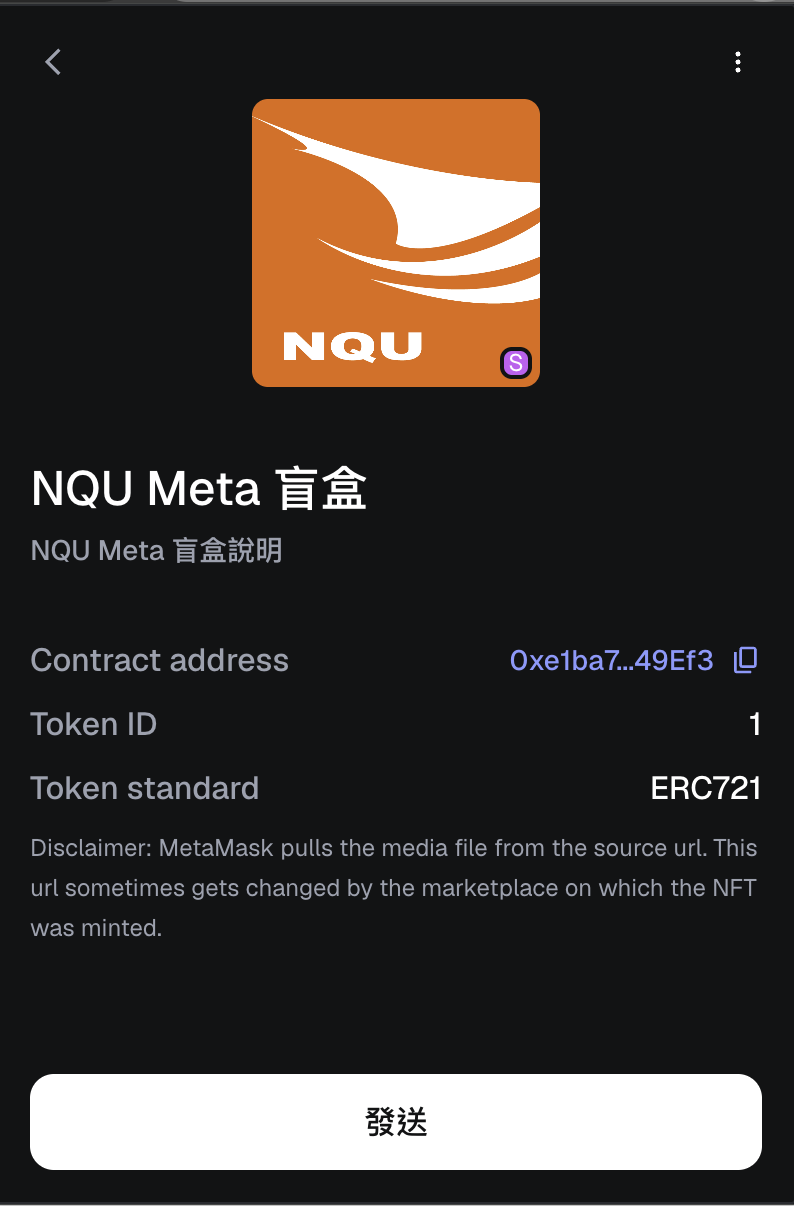

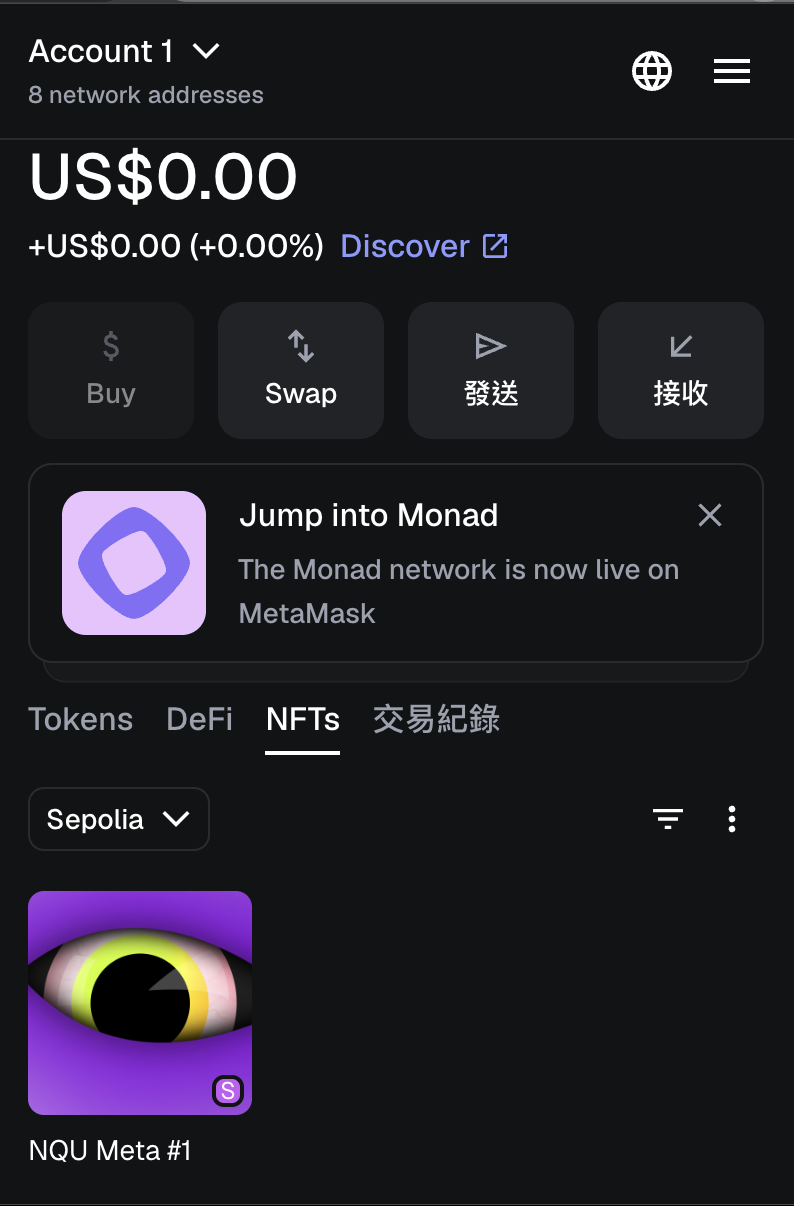

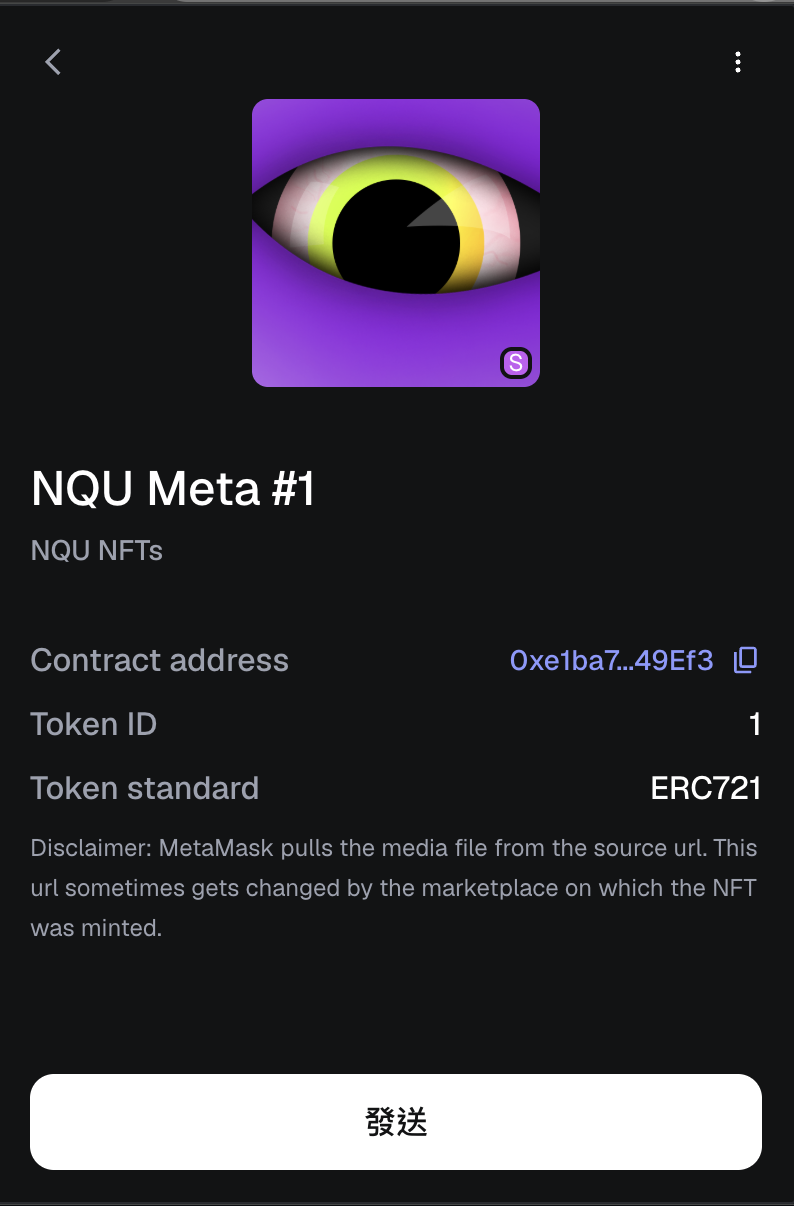

• OpenSea 測試網路- https://testnets.opensea.io

• ThirdWeb 網路- https://thirdweb.com/

• OpenSea 網路- https://opensea.io/

• SolSea 網路- https://solsea.io/login/

• HashLips 組圖專案- https://github.com/HashLips/hashlips_art_engine



1.   _notRevealedURI: https://ipfs.io/ipfs/bafkreignhq3b6srrvenn4kkbsuvg5jpidt24rs5446f3nohx3u236cmeu4
2.   _newBaseURI:
https://ipfs.io/ipfs/bafybeibxuin3ros2dxkax5l4cfcsyfuuqqc6qsjo5e47yct7tkske5wqtu/

In [12]:
%%writefile /content/NQU_Unpack.json
{
  "name": "NQU Meta 盲盒",
  "description": "NQU Meta 盲盒說明",
  "image": "https://ipfs.io/ipfs/QmfZopS6hKcpfzNyntrBwDuoQQwpMnzW3QqTt8eTBTEXMc"
}

Writing /content/NQU_Unpack.json


In [13]:
from google.colab import files
files.download("/content/NQU_Unpack.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
!git clone https://github.com/HashLips/hashlips_art_engine

Cloning into 'hashlips_art_engine'...
remote: Enumerating objects: 665, done.
remote: Total 665 (delta 0), reused 0 (delta 0), pack-reused 665 (from 1)
Receiving objects: 100% (665/665), 7.03 MiB | 51.05 MiB/s, done.
Resolving deltas: 100% (305/305), done.


In [2]:
!apt-get update
!apt-get install -y libcairo2-dev libpango1.0-dev libjpeg-dev libgif-dev librsvg2-dev

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,539 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packag

In [3]:
cd hashlips_art_engine

/content/hashlips_art_engine


In [4]:
!sed -i 's/let i = network == NETWORK.sol ? 0 : 1/let i = 0/' ./src/main.js

In [5]:
!npm install canvas --build-from-source

⠙npm warn old lockfile
npm warn old lockfile The package-lock.json file was created with an old version of npm,
npm warn old lockfile so supplemental metadata must be fetched from the registry.
npm warn old lockfile
npm warn old lockfile This is a one-time fix-up, please be patient...
npm warn old lockfile
⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦npm warn deprecated inflight@1.0.6: This module is not supported, and leaks memory. Do not use it. Check out lru-cache if you want a good and tested way to coalesce async requests by a key value, which is much more comprehensive and powerful.
⠦⠧⠇npm warn deprecated rimraf@3.0.2: Rimraf versions prior to v4 are no longer supported
⠇⠏npm warn deprecated npmlog@5.0.1: This package is no longer supported.
⠏npm warn deprecated are-we-there-yet@2.0.0: This package is no longer supported.
⠋npm warn deprecated glob@7.2.0: Glob versions prior to v9 are no longer supported
⠋npm warn deprecated gauge@3.0.1: This package is no longer supported.
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦

In [6]:
!npm audit fix

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
added 1 package, removed 1 package, changed 8 packages, and audited 66 packages in 1s
⠸
⠸6 packages are looking for funding
⠸  run `npm fund` for details
⠸
found 0 vulnerabilities
⠸

In [8]:
!npm install

⠙⠹⠸⠼
up to date, audited 66 packages in 676ms
⠼
⠼6 packages are looking for funding
⠼  run `npm fund` for details
⠼
found 0 vulnerabilities
⠼

In [14]:
!npm run

Scripts available in hashlips_art_engine@1.1.1 via `npm run-script`:
  build
    node index.js
  generate
    node index.js
  rarity
    node utils/rarity.js
  preview
    node utils/preview.js
  pixelate
    node utils/pixelate.js
  update_info
    node utils/update_info.js
  preview_gif
    node utils/preview_gif.js
  generate_metadata
    node utils/generate_metadata.js


In [15]:
!npm run build


> hashlips_art_engine@1.1.1 build
> node index.js

Created edition: 0, with DNA: 749f101fac6b14a3ad2024d979ad264167b8f104
Created edition: 1, with DNA: 59ed9aa1f8dba18e866485aeda070367f75a8c6f
Created edition: 2, with DNA: f696ea4c20ab1ee434ba5b8e99a4af0f4f10a4b0
Created edition: 3, with DNA: 73b7659be1563abe520023cd4b8a913cba54767d
Created edition: 4, with DNA: 1dc0cdb3578a08d20d595d55c667c2f385d504f7
⠙

In [16]:
!npm run preview


> hashlips_art_engine@1.1.1 preview
> node utils/preview.js

Preparing a 250x50 project preview with 5 thumbnails.
Project preview image located at: /content/hashlips_art_engine/build/preview.png
⠙

In [17]:
%%writefile ./src/config.js
const basePath = process.cwd();
const { MODE } = require(`${basePath}/constants/blend_mode.js`);
const { NETWORK } = require(`${basePath}/constants/network.js`);

const network = NETWORK.eth;

// General metadata for Ethereum
const namePrefix = "NQU Meta"; // "Your Collection"
const description = "NQU NFTs" // "Remember to replace this description"
const baseUri = "https://ipfs.io/ipfs/bafybeib2u2mk2cmexig4i2ip6khx3ht4ez7wmiwlstxiblfljrlhx7gwoe"; // "ipfs://NewUriToReplace"


const solanaMetadata = {
  symbol: "NQUCoin",
  seller_fee_basis_points: 1000, // Define how much % you want from secondary market sales 1000 = 10%
  external_url: "https://www.youtube.com/c/ccwu0918",
  creators: [
    {
      address: "DNRVj69fPqvqLifcszt5XP54D92fsih4cDTSqAr6vB38",
      share: 100,
    },
  ],
};

// If you have selected Solana then the collection starts from 0 automatically
const layerConfigurations = [
  {
    growEditionSizeTo: 10,
    layersOrder: [
      { name: "Background" },
      { name: "Eyeball" },
      { name: "Eye color" },
      { name: "Iris" },
      { name: "Shine" },
      { name: "Bottom lid" },
      { name: "Top lid" },
    ],
  },
];

const shuffleLayerConfigurations = false;

const debugLogs = false;

const format = {
  width: 512,
  height: 512,
  smoothing: false,
};

const gif = {
  export: false,
  repeat: 0,
  quality: 100,
  delay: 500,
};

const text = {
  only: false,
  color: "#ffffff",
  size: 20,
  xGap: 40,
  yGap: 40,
  align: "left",
  baseline: "top",
  weight: "regular",
  family: "Courier",
  spacer: " => ",
};

const pixelFormat = {
  ratio: 2 / 128,
};

const background = {
  generate: true,
  brightness: "80%",
  static: false,
  default: "#000000",
};

const extraMetadata = {};

const rarityDelimiter = "#";

const uniqueDnaTorrance = 10000;

const preview = {
  thumbPerRow: 5,
  thumbWidth: 50,
  imageRatio: format.height / format.width,
  imageName: "preview.png",
};

const preview_gif = {
  numberOfImages: 5,
  order: "ASC", // ASC, DESC, MIXED
  repeat: 0,
  quality: 100,
  delay: 500,
  imageName: "preview.gif",
};

module.exports = {
  format,
  baseUri,
  description,
  background,
  uniqueDnaTorrance,
  layerConfigurations,
  rarityDelimiter,
  preview,
  shuffleLayerConfigurations,
  debugLogs,
  extraMetadata,
  pixelFormat,
  text,
  namePrefix,
  network,
  solanaMetadata,
  gif,
  preview_gif,
};

Overwriting ./src/config.js


In [19]:
!npm run build


> hashlips_art_engine@1.1.1 build
> node index.js

(node:6888) [DEP0147] DeprecationWarning: In future versions of Node.js, fs.rmdir(path, { recursive: true }) will be removed. Use fs.rm(path, { recursive: true }) instead
(Use `node --trace-deprecation ...` to show where the warning was created)
Created edition: 0, with DNA: 82c5ae136de47a627f25569d5d128f1de076a85b
Created edition: 1, with DNA: c2fa7789e792960ccc49ec073f9dfd81cc0fb6c3
Created edition: 2, with DNA: f5442e9d373d9d1d93d089e18fdf3584cb4fe44b
Created edition: 3, with DNA: 75e313cf2f54b7abcff09a7cab8c557510ab0c80
Created edition: 4, with DNA: f795dbbebbe18288e2db37c0dcf21e202823d597
Created edition: 5, with DNA: 9bbb5b6b181ea759599177d7b0416de3c1c6dddd
Created edition: 6, with DNA: cfa27eeba852b5a1cc1b861892aa36c65b2df024
Created edition: 7, with DNA: 348e6b6b9fa0178f46870a88059e510b84f3a02e
Created edition: 8, with DNA: 0de3c8add53f3a8fd2c6a653dad9f3a646255121
DNA exists!
Created edition: 9, with DNA: 5119a478ff2d5f26d5890

In [20]:
!npm run preview


> hashlips_art_engine@1.1.1 preview
> node utils/preview.js

Preparing a 250x100 project preview with 10 thumbnails.
Project preview image located at: /content/hashlips_art_engine/build/preview.png
⠙

In [21]:
!npm run update_info


> hashlips_art_engine@1.1.1 update_info
> node utils/update_info.js

Updated baseUri for images to ===> https://ipfs.io/ipfs/bafybeib2u2mk2cmexig4i2ip6khx3ht4ez7wmiwlstxiblfljrlhx7gwoe
Updated description for images to ===> NQU NFTs
Updated name prefix for images to ===> NQU Meta
⠙

In [23]:
!zip -r /content/META_IMAGES.zip ./build/images

  adding: build/images/ (stored 0%)
  adding: build/images/4.png (deflated 0%)
  adding: build/images/2.png (deflated 0%)
  adding: build/images/5.png (deflated 0%)
  adding: build/images/9.png (deflated 0%)
  adding: build/images/7.png (deflated 0%)
  adding: build/images/6.png (deflated 0%)
  adding: build/images/1.png (deflated 0%)
  adding: build/images/0.png (deflated 0%)
  adding: build/images/8.png (deflated 0%)
  adding: build/images/3.png (deflated 0%)


In [24]:
from google.colab import files
files.download("/content/META_IMAGES.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
!zip -r /content/META_JSONS.zip ./build/json

  adding: build/json/ (stored 0%)
  adding: build/json/5.json (deflated 56%)
  adding: build/json/4.json (deflated 55%)
  adding: build/json/3.json (deflated 56%)
  adding: build/json/7.json (deflated 56%)
  adding: build/json/2.json (deflated 56%)
  adding: build/json/1.json (deflated 55%)
  adding: build/json/8.json (deflated 56%)
  adding: build/json/9.json (deflated 55%)
  adding: build/json/_metadata.json (deflated 90%)
  adding: build/json/0.json (deflated 55%)
  adding: build/json/6.json (deflated 56%)


In [26]:
from google.colab import files
files.download("/content/META_JSONS.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



# Connect to Ethereum node with Web3 Python

https://youtu.be/DsAoff7yudQ?si=JPMl_cnSdNbaifgy

In [ ]:
# !pip install pyngrok
# from pyngrok import ngrok
# public_url = ngrok.connect(8545, "http")
# print(public_url)

In [ ]:
# !pip install web3
!pip install web3[tester]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.5/587.5 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.3/339.3 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.4/171.4 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190

In [ ]:
from web3 import Web3

In [ ]:
Web3

web3.main.Web3

# Tools for testing Ethereum applications



https://pypi.org/project/eth-tester/

In [ ]:
# !pip install eth-tester[py-evm]

# Task
How to send a transaction using EthereumTester

Send a transaction using EthereumTester.

In [ ]:
from eth_tester import EthereumTester
t = EthereumTester()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Get accounts

### Subtask:
Retrieve the available accounts from the `EthereumTester` instance.


**Reasoning**:
Retrieve the available accounts from the EthereumTester instance and store them in a variable, then print the variable.



In [ ]:
t.get_accounts()

['0x7E5F4552091A69125d5DfCb7b8C2659029395Bdf',
 '0x2B5AD5c4795c026514f8317c7a215E218DcCD6cF',
 '0x6813Eb9362372EEF6200f3b1dbC3f819671cBA69',
 '0x1efF47bc3a10a45D4B230B5d10E37751FE6AA718',
 '0xe1AB8145F7E55DC933d51a18c793F901A3A0b276',
 '0xE57bFE9F44b819898F47BF37E5AF72a0783e1141',
 '0xd41c057fd1c78805AAC12B0A94a405c0461A6FBb',
 '0xF1F6619B38A98d6De0800F1DefC0a6399eB6d30C',
 '0xF7Edc8FA1eCc32967F827C9043FcAe6ba73afA5c',
 '0x4CCeBa2d7D2B4fdcE4304d3e09a1fea9fbEb1528']

In [ ]:
accounts = t.get_accounts()
print(accounts)

['0x7E5F4552091A69125d5DfCb7b8C2659029395Bdf', '0x2B5AD5c4795c026514f8317c7a215E218DcCD6cF', '0x6813Eb9362372EEF6200f3b1dbC3f819671cBA69', '0x1efF47bc3a10a45D4B230B5d10E37751FE6AA718', '0xe1AB8145F7E55DC933d51a18c793F901A3A0b276', '0xE57bFE9F44b819898F47BF37E5AF72a0783e1141', '0xd41c057fd1c78805AAC12B0A94a405c0461A6FBb', '0xF1F6619B38A98d6De0800F1DefC0a6399eB6d30C', '0xF7Edc8FA1eCc32967F827C9043FcAe6ba73afA5c', '0x4CCeBa2d7D2B4fdcE4304d3e09a1fea9fbEb1528']


In [ ]:
from eth_account import Account

In [ ]:
import eth_tester.backends.pyevm
print(dir(eth_tester.backends.pyevm))

['PyEVMBackend', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'is_supported_pyevm_version_available', 'main', 'serializers', 'utils']


In [ ]:
from web3 import Web3
# from web3.providers.eth_tester import EthereumTesterProvider
# from web3 import EthereumTesterProvider

# 連接到 Ethereum Tester
# w3 = Web3(EthereumTesterProvider())
w3 = Web3(Web3.EthereumTesterProvider())

# 檢查是否連接成功
# assert w3.is_connected()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# 檢查是否連接成功
w3.is_connected()

True

In [ ]:
latest_block_number = w3.eth.block_number

latest_block_number

0

In [ ]:
latest_block = w3.eth.get_block(latest_block_number)

latest_block

AttributeDict({'number': 0,
 'hash': HexBytes('0x4939df99e3a3d9c775d314799dfa251e94476746dc3814da95801af81902912d'),
 'parentHash': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'nonce': HexBytes('0x0000000000000000'),
 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
 'logsBloom': HexBytes('0x00'),
 'transactionsRoot': HexBytes('0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996cadc001622fb5e363b421'),
 'receiptsRoot': HexBytes('0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996cadc001622fb5e363b421'),
 'stateRoot': HexBytes('0xf1588db9a9f1ed91effabdec31f93cb4212b008c8b8ba047fd55fabebf6fd727'),
 'miner': '0x0000000000000000000000000000000000000000',
 'difficulty': 0,
 'totalDifficulty': 0,
 'mixHash': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'size': 616,
 'extraData': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'gasLimit': 30029122,
 'gasUs

## Prepare transaction

### Subtask:
Create a transaction dictionary with details like the sender, recipient, value, and gas.


In [ ]:
# w3.auto_mine_transactions = True

**Reasoning**:
Create a transaction dictionary with the specified details using the accounts retrieved earlier and print it.



In [ ]:
nonce = w3.eth.get_transaction_count(accounts[0])
# nonce = t.get_nonce(accounts[0])

In [ ]:
nonce

0

In [ ]:
# Check the balance of the sender account (accounts[0])
sender_balance = w3.eth.get_balance(accounts[0])
print(f"Sender balance: {w3.from_wei(sender_balance, 'ether')} Ether")

# Check the balance of the receiver account (accounts[1])
receiver_balance = w3.eth.get_balance(accounts[1])
print(f"Receiver balance: {w3.from_wei(receiver_balance, 'ether')} Ether")

In [ ]:
transaction = {
    'from': accounts[0],
    'to': accounts[1],
    'value': w3.to_wei(10, 'ether'),
    'gas': 21000,
    'gasPrice': w3.to_wei(1, 'gwei'),
    'nonce': w3.eth.get_transaction_count(accounts[0]),
    'chainId': w3.eth.chain_id
}

transaction

{'from': '0x7E5F4552091A69125d5DfCb7b8C2659029395Bdf',
 'to': '0x2B5AD5c4795c026514f8317c7a215E218DcCD6cF',
 'value': 10000000000000000000,
 'gas': 21000,
 'gasPrice': 1000000000,
 'nonce': 0}

In [ ]:
# The EthereumTesterProvider handles signing internally when using w3.eth.send_transaction
# Send the transaction using one of the pre-funded accounts from EthereumTester
tx_hash = w3.eth.send_transaction(transaction)
tx_hash

HexBytes('0xe9f3892068268109fdfb5f3737f2b5889d053646b5d3e28332b05b54a87febb6')

In [ ]:
tx_receipt = w3.eth.wait_for_transaction_receipt(tx_hash)
tx_receipt

AttributeDict({'blockHash': HexBytes('0x03cfa5a729df719af30d034fde80f568b3d7d2f421a308532001e4dad36e09a4'),
 'blockNumber': 2,
 'contractAddress': None,
 'cumulativeGasUsed': 21000,
 'effectiveGasPrice': 1000000000,
 'from': '0x7E5F4552091A69125d5DfCb7b8C2659029395Bdf',
 'gasUsed': 21000,
 'logs': [],
 'state_root': b'\x01',
 'status': 1,
 'to': '0xDF14b11AD6eA8cEe5023335b8eBBb25538f42D20',
 'transactionHash': HexBytes('0xe9f3892068268109fdfb5f3737f2b5889d053646b5d3e28332b05b54a87febb6'),
 'transactionIndex': 0,
 'type': 0})

In [ ]:
# Check the balance of the sender account (accounts[0])
sender_balance = w3.eth.get_balance(accounts[0])
print(f"Sender balance: {w3.from_wei(sender_balance, 'ether')} Ether")

# Check the balance of the receiver account (accounts[1])
receiver_balance = w3.eth.get_balance(accounts[1])
print(f"Receiver balance: {w3.from_wei(receiver_balance, 'ether')} Ether")

Sender balance: 999979.999958 Ether
Receiver balance: 1000010 Ether


In [ ]:
latest_block_number = w3.eth.block_number

latest_block_number

1

In [ ]:
latest_block = w3.eth.get_block(latest_block_number)

latest_block

AttributeDict({'number': 1,
 'hash': HexBytes('0x4d3fffa8f45b3d8a8d4fb4f97aad00c3677aff874f1c7b82029741010168f243'),
 'parentHash': HexBytes('0x4939df99e3a3d9c775d314799dfa251e94476746dc3814da95801af81902912d'),
 'nonce': HexBytes('0x0000000000000000'),
 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
 'logsBloom': HexBytes('0x00'),
 'transactionsRoot': HexBytes('0xecc39bb0b6ded3428395375e4651595ef014346fa869b2407f421df6b2c633d2'),
 'receiptsRoot': HexBytes('0x056b23fbba480696b65fe5a59b8f2148a1299103c4f57df839233af2cf4ca2d2'),
 'stateRoot': HexBytes('0x7fdcdf88864a5a679e4b5194367564a9a924891c4b22783f7f9d66f1618abbed'),
 'miner': '0x0000000000000000000000000000000000000000',
 'difficulty': 0,
 'totalDifficulty': 0,
 'mixHash': HexBytes('0xa31b3a32c066c1d2353c58cc79890c6abba4fbdfd2bf6a86bcaae0cfcd0ae650'),
 'size': 728,
 'extraData': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'gasLimit': 30029122,
 'gasUs

In [ ]:
# Create a wallet/account
account = w3.eth.account.create()
private_key = account.key
print("Address:", account.address)
print("Private Key:", account.key.hex())

Address: 0xDF14b11AD6eA8cEe5023335b8eBBb25538f42D20
Private Key: 4d1dadde247cdb854ef6da80e86abda0b79561c09ab5047a6d41a164c82dd82e


In [ ]:
# Check the balance of the sender account (accounts[0])
sender_balance = w3.eth.get_balance(accounts[0])
print(f"Sender balance: {w3.from_wei(sender_balance, 'ether')} Ether")

# Check the balance of the receiver account (accounts[1])
receiver_balance = w3.eth.get_balance(account.address)
print(f"Receiver balance: {w3.from_wei(receiver_balance, 'ether')} Ether")

Sender balance: 999979.999958 Ether
Receiver balance: 10 Ether


In [ ]:
transaction = {
    'from': accounts[0],
    'to': account.address,
    'value': w3.to_wei(100, 'ether'),
    'gas': 21000,
    'gasPrice': w3.to_wei(1, 'gwei'),
    'nonce': w3.eth.get_transaction_count(accounts[0]),
    'chainId': w3.eth.chain_id
}

transaction

{'from': '0x7E5F4552091A69125d5DfCb7b8C2659029395Bdf',
 'to': '0xDF14b11AD6eA8cEe5023335b8eBBb25538f42D20',
 'value': 100000000000000000000,
 'gas': 21000,
 'gasPrice': 1000000000,
 'nonce': 2,
 'chainId': 131277322940537}

In [ ]:
# The EthereumTesterProvider handles signing internally when using w3.eth.send_transaction
# Send the transaction using one of the pre-funded accounts from EthereumTester
tx_hash = w3.eth.send_transaction(transaction)
tx_hash

HexBytes('0xa21159eb35704d8544ed04d1a9c1e8e83f01235acec43860237d98eef217f352')

In [ ]:
tx_receipt = w3.eth.wait_for_transaction_receipt(tx_hash)
tx_receipt

AttributeDict({'blockHash': HexBytes('0x9e17476327ec1acc0477d69f97112ae550b910b6569dec3685595ce857dd7a72'),
 'blockNumber': 3,
 'contractAddress': None,
 'cumulativeGasUsed': 21000,
 'effectiveGasPrice': 1000000000,
 'from': '0x7E5F4552091A69125d5DfCb7b8C2659029395Bdf',
 'gasUsed': 21000,
 'logs': [],
 'state_root': b'\x01',
 'status': 1,
 'to': '0xDF14b11AD6eA8cEe5023335b8eBBb25538f42D20',
 'transactionHash': HexBytes('0xa21159eb35704d8544ed04d1a9c1e8e83f01235acec43860237d98eef217f352'),
 'transactionIndex': 0,
 'type': 0})

In [ ]:
# Check the balance of the sender account (accounts[0])
sender_balance = w3.eth.get_balance(accounts[0])
print(f"Sender balance: {w3.from_wei(sender_balance, 'ether')} Ether")

# Check the balance of the receiver account (accounts[1])
receiver_balance = w3.eth.get_balance(account.address)
print(f"Receiver balance: {w3.from_wei(receiver_balance, 'ether')} Ether")

Sender balance: 999879.999937 Ether
Receiver balance: 110 Ether


In [ ]:
latest_block_number = w3.eth.block_number

latest_block_number

4

In [ ]:
latest_block = w3.eth.get_block(latest_block_number)

latest_block

AttributeDict({'number': 4,
 'hash': HexBytes('0x0501293ef5afe8602f951f7aba9d45ca016d6d49360cec03ddcc3027ac79746e'),
 'parentHash': HexBytes('0x9e17476327ec1acc0477d69f97112ae550b910b6569dec3685595ce857dd7a72'),
 'nonce': HexBytes('0x0000000000000000'),
 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
 'logsBloom': HexBytes('0x00'),
 'transactionsRoot': HexBytes('0x15ec8b35e0b22fbe6f8a8c9673be50805d48117d1ee12394c17768a86255ff7b'),
 'receiptsRoot': HexBytes('0x056b23fbba480696b65fe5a59b8f2148a1299103c4f57df839233af2cf4ca2d2'),
 'stateRoot': HexBytes('0xc9af09080c7bd06ecedca6145b7e3b2a6653e0de01bdb7116ba37c6c316700e9'),
 'miner': '0x0000000000000000000000000000000000000000',
 'difficulty': 0,
 'totalDifficulty': 0,
 'mixHash': HexBytes('0x57f372662d2c9edd4087ec63a40a8da39ec7660e3182bc39cdf555ee4aa000a8'),
 'size': 735,
 'extraData': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'gasLimit': 30029122,
 'gasUs

## Sign transaction

### Subtask:
Sign the transaction using the private key of the sender account.


**Reasoning**:
Sign the transaction using the private key of the sender account.



In [ ]:
w3.eth.account.from_key(account.key).address

'0xDF14b11AD6eA8cEe5023335b8eBBb25538f42D20'

In [ ]:
private_key = account.key

In [ ]:
private_key

HexBytes('0x4d1dadde247cdb854ef6da80e86abda0b79561c09ab5047a6d41a164c82dd82e')

In [ ]:
# Send a transaction (example, testnet recommended)
txn = {
    'to': accounts[1], # '0xRecipientAddress'
    'value': w3.to_wei(5, 'ether'),
    'gas': 21000,
    'gasPrice': w3.to_wei('50', 'gwei'),
    'nonce': w3.eth.get_transaction_count(account.address),
    'chainId': w3.eth.chain_id
}
txn

{'to': '0x2B5AD5c4795c026514f8317c7a215E218DcCD6cF',
 'value': 5000000000000000000,
 'gas': 21000,
 'gasPrice': 50000000000,
 'nonce': 1,
 'chainId': 131277322940537}

In [ ]:
# Sign the transaction using the private key of the sender account.

# w3.eth.accounts.index_to_key[0]
signed_txn = w3.eth.account.sign_transaction(txn, private_key)

signed_txn

w3.eth.send_raw_transaction(signed_txn.raw_transaction)

HexBytes('0x1a17ff55c1047dea16aab0bda40a5250be6a5103c5ca662a9cafb2d683d5d10f')

In [ ]:
# Check the balance of the sender account (accounts[0])
sender_balance = w3.eth.get_balance(account.address)
print(f"Sender balance: {w3.from_wei(sender_balance, 'ether')} Ether")

# Check the balance of the receiver account (accounts[1])
receiver_balance = w3.eth.get_balance(accounts[1])
print(f"Receiver balance: {w3.from_wei(receiver_balance, 'ether')} Ether")

Sender balance: 99.9979 Ether
Receiver balance: 1000020 Ether


In [ ]:
latest_block_number = w3.eth.block_number

latest_block_number

5

In [ ]:
latest_block = w3.eth.get_block(latest_block_number)

latest_block

AttributeDict({'number': 5,
 'hash': HexBytes('0x3c17adab6bf76222c5c2d3ea5911432b02cd3e8cb1e0774836a48bb6d00acf88'),
 'parentHash': HexBytes('0x0501293ef5afe8602f951f7aba9d45ca016d6d49360cec03ddcc3027ac79746e'),
 'nonce': HexBytes('0x0000000000000000'),
 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
 'logsBloom': HexBytes('0x00'),
 'transactionsRoot': HexBytes('0x7a23299b596f3d7cb2ce51bf3562a6e9ad8c8b123cac7d6d328d4ba3821c07f4'),
 'receiptsRoot': HexBytes('0x056b23fbba480696b65fe5a59b8f2148a1299103c4f57df839233af2cf4ca2d2'),
 'stateRoot': HexBytes('0x87e83eeb04f8b902b93ffe9cf33ab5e32883028899a541d634322b114d2141c0'),
 'miner': '0x0000000000000000000000000000000000000000',
 'difficulty': 0,
 'totalDifficulty': 0,
 'mixHash': HexBytes('0x0ca83121fc2fca1f2a5607fb82b44ee4af012c76049c689e898584da211d962c'),
 'size': 735,
 'extraData': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'gasLimit': 30029122,
 'gasUs



---



# Task
Deploy a simple smart contract using Web3.py and EthereumTester.

In [ ]:
!pip install py-solc-x

In [ ]:
# @title
# check if notebook is in colab
try:
    import google.colab
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "solc-select"])
    !solc-select install 0.8.20
    !solc-select use 0.8.20
    !solc --version

# rely on local installation if the notebook is not in colab
except:
    pass

Installing solc '0.8.20'...
Version '0.8.20' installed.
Switched global version to 0.8.20
solc, the solidity compiler commandline interface
Version: 0.8.20+commit.a1b79de6.Linux.g++


In [ ]:
from solcx import install_solc

install_solc('0.8.30')

<Version('0.8.30')>

## Write the smart contract

### Subtask:
Write the Solidity code for a simple smart contract.


**Reasoning**:
Write the Solidity code for a simple smart contract and store it in a variable.



In [ ]:
contract_source_code = """
pragma solidity ^0.8.0;

contract SimpleStorage {
    uint256 public storedData;

    function set(uint256 x) public {
        storedData = x;
    }

    function get() public view returns (uint256) {
        return storedData;
    }
}
"""

In [ ]:
contract_source_code = """
// SPDX-License-Identifier: GPL-3.0

pragma solidity >=0.8.2 <0.9.0;

/**
 * @title Storage
 * @dev Store & retrieve value in a variable
 * @custom:dev-run-script ./scripts/deploy_with_ethers.ts
 */
contract Storage {

    uint256 number;

    /**
     * @dev Store value in variable
     * @param num value to store
     */
    function store(uint256 num) public {
        number = num;
    }

    /**
     * @dev Return value
     * @return value of 'number'
     */
    function retrieve() public view returns (uint256){
        return number;
    }
}
"""

## Compile the smart contract

### Subtask:
Compile the Solidity code using `solcx` to get the bytecode and ABI.


**Reasoning**:
Import the necessary function from solcx and compile the Solidity code to get the abi and bytecode.



**Reasoning**:
Correct the syntax error in the previous code block and re-compile the Solidity code to get the abi and bytecode.



**Reasoning**:
The solcx module is not found, so install it using pip.



**Reasoning**:
Since installing 'solcx' directly failed, try installing 'py-solc-x' which provides the necessary functionality.



**Reasoning**:
Import the compile_source function from solcx and compile the Solidity code to get the abi and bytecode as the py-solc-x package has been installed.



**Reasoning**:
Solc is not installed, so install the recommended version (0.8.20) using `solcx.install_solc()`.



**Reasoning**:
Now that solc is installed, compile the Solidity code using `compile_source` to get the abi and bytecode.



**Reasoning**:
Correct the typo in `output_attriutes` to `output_values` and re-compile the Solidity code to get the abi and bytecode.



Build a Hello World Solidity smart contract in Colab

In [ ]:
# from solcx import SolidityCompiler

In [ ]:
from solcx import compile_source

compiled_sol = compile_source(
    contract_source_code,
    output_values=['abi', 'bin'],
    solc_version='0.8.30'
)

abi = compiled_sol['<stdin>:Storage']['abi']
bytecode = compiled_sol['<stdin>:Storage']['bin']

In [ ]:
abi

[{'inputs': [],
  'name': 'retrieve',
  'outputs': [{'internalType': 'uint256', 'name': '', 'type': 'uint256'}],
  'stateMutability': 'view',
  'type': 'function'},
 {'inputs': [{'internalType': 'uint256', 'name': 'num', 'type': 'uint256'}],
  'name': 'store',
  'outputs': [],
  'stateMutability': 'nonpayable',
  'type': 'function'}]

In [ ]:
bytecode

'6080604052348015600e575f5ffd5b506101298061001c5f395ff3fe6080604052348015600e575f5ffd5b50600436106030575f3560e01c80632e64cec11460345780636057361d14604e575b5f5ffd5b603a6066565b60405160459190608d565b60405180910390f35b606460048036038101906060919060cd565b606e565b005b5f5f54905090565b805f8190555050565b5f819050919050565b6087816077565b82525050565b5f602082019050609e5f8301846080565b92915050565b5f5ffd5b60af816077565b811460b8575f5ffd5b50565b5f8135905060c78160a8565b92915050565b5f6020828403121560df5760de60a4565b5b5f60ea8482850160bb565b9150509291505056fea264697066735822122084dd5caae039d588401a168c013f46f8316a3712424464978a13b24d7f7afbbb64736f6c634300081e0033'

## Deploy the smart contract

### Subtask:
Use Web3.py to deploy the compiled smart contract to the Ethereum tester.


**Reasoning**:
Get the deployer account, create the contract factory, build the deployment transaction, send the transaction, wait for the receipt, extract the contract address, and print it.



In [ ]:
deployer_account = accounts[0]

SimpleStorage = w3.eth.contract(abi=abi, bytecode=bytecode)

transaction = SimpleStorage.constructor().build_transaction({
    'from': deployer_account,
    'gas': 1000000, # Increased gas limit for deployment
    'gasPrice': w3.to_wei(1, 'gwei'),
    'nonce': w3.eth.get_transaction_count(deployer_account),
})

tx_hash = w3.eth.send_transaction(transaction)

tx_receipt = w3.eth.wait_for_transaction_receipt(tx_hash)

contract_address = tx_receipt.contractAddress

contract_address

'0x2946259E0334f33A064106302415aD3391BeD384'

## Verify deployment

### Subtask:
Confirm the smart contract has been deployed successfully.


**Reasoning**:
Create a contract instance using the deployed contract address and ABI, then call the get() function and print the result.



In [ ]:
contract_instance = w3.eth.contract(address=contract_address, abi=abi)

initial_value = contract_instance.functions.retrieve().call()
print(f"Initial value of storedData: {initial_value}")

Initial value of storedData: 0


In [ ]:
contract_instance = w3.eth.contract(address=contract_address, abi=abi)

contract_instance.functions.store(200).transact({'from': accounts[0]})

new_value = contract_instance.functions.retrieve().call()

print(f"Initial value of storedData: {new_value}")

Initial value of storedData: 200


In [ ]:
wallet0 = w3.to_checksum_address(accounts[0])

In [ ]:
print(w3.eth.get_balance(wallet0))

999989999846057000000000


In [ ]:
print(w3.from_wei(w3.eth.get_balance(wallet0), 'ether'))

999989.999846057


In [ ]:
wallet1 = w3.to_checksum_address(accounts[1])

In [ ]:
print(w3.eth.get_balance(wallet1))

1000010000000000000000000


In [ ]:
print(w3.from_wei(w3.eth.get_balance(wallet1), 'ether'))

1000010


In [ ]:
latest_block_number = w3.eth.block_number

latest_block_number

5

In [ ]:
latest_block = w3.eth.get_block(latest_block_number)

latest_block

AttributeDict({'number': 5,
 'hash': HexBytes('0xf1d11f3df5bfbedef89eaa903e7db64a771da84ae0ac076c61e5ae2bef1c05e8'),
 'parentHash': HexBytes('0xdcf1eabbbf221802a7a7efa8512befebc258fbcd74822bb8cef440eb8eaf9e2b'),
 'nonce': HexBytes('0x0000000000000000'),
 'sha3Uncles': HexBytes('0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347'),
 'logsBloom': HexBytes('0x00'),
 'transactionsRoot': HexBytes('0xae4813802b663111cf34fcbcd1414c56aaea466ed7366b3791b11b7481f74735'),
 'receiptsRoot': HexBytes('0x90b23c6bb399b8974663b7f3a015ea8abbf4d8c827e0916c48ae83f7654a3a16'),
 'stateRoot': HexBytes('0x4d3306a88773449daf5cf188c536aefc2b6a0d4a663aa08d9bad7fcb17c96abb'),
 'miner': '0x0000000000000000000000000000000000000000',
 'difficulty': 0,
 'totalDifficulty': 0,
 'mixHash': HexBytes('0x8572a8d9401894768aa4f2cbb904731b76ff31391cf715bf1dbe4df5e41dfb1e'),
 'size': 773,
 'extraData': HexBytes('0x0000000000000000000000000000000000000000000000000000000000000000'),
 'gasLimit': 30029122,
 'gasUs

In [ ]:
print(w3.is_address('0x1234567890123456789012345678901234567890'))

True


In [ ]:
print(w3.is_address('0xf5E128551d45F7baeaDb6c7f0DAa17Cb9678Ba41'))

True


In [ ]:
wallet = w3.to_checksum_address('0xf5E128551d45F7baeaDb6c7f0DAa17Cb9678Ba41')

In [ ]:
print(w3.eth.get_balance(wallet))

0


In [ ]:
print(w3.from_wei(111111111111111111111, 'ether'))

111.111111111111111111


In [ ]:
print(w3.from_wei(w3.eth.get_balance(wallet), 'ether'))

0




---



# Connect to Ethereum mainnet with HTTP provider Infura

https://www.infura.io/zh

https://developer.metamask.io/

In [ ]:
# Connect to an Ethereum node (e.g., Ganache, Infura, Alchemy, etc.)

# provider_url = 'http://127.0.0.1:8545'
# provider_url = "https://mainnet.infura.io/v3/YOUR_INFURA_KEY"
provider_url = 'https://mainnet.infura.io/v3/01279796ef4f413c97c75f5e6adf4fdb'

w3 = Web3(Web3.HTTPProvider(provider_url))
w3.is_connected()

True

In [ ]:
from eth_account import Account
# Load your private key (replace with your actual private key)
# It's crucial to handle private keys securely and never hardcode them in production.
# private_key = b'YOUR_PRIVATE_KEY_IN_BYTES'
# account = Account.from_key(private_key)

# Build an unsigned transaction
# nonce = w3.eth.get_transaction_count(account.address)

# Interact with bloakchain contract with Web3 Python

https://etherscan.io/

https://etherscan.io/address/0xe592427a0aece92de3edee1f18e0157c05861564#code

In [ ]:
abi = '[{"inputs":[{"internalType":"address","name":"_factory","type":"address"},{"internalType":"address","name":"_WETH9","type":"address"}],"stateMutability":"nonpayable","type":"constructor"},{"inputs":[],"name":"WETH9","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"components":[{"internalType":"bytes","name":"path","type":"bytes"},{"internalType":"address","name":"recipient","type":"address"},{"internalType":"uint256","name":"deadline","type":"uint256"},{"internalType":"uint256","name":"amountIn","type":"uint256"},{"internalType":"uint256","name":"amountOutMinimum","type":"uint256"}],"internalType":"struct ISwapRouter.ExactInputParams","name":"params","type":"tuple"}],"name":"exactInput","outputs":[{"internalType":"uint256","name":"amountOut","type":"uint256"}],"stateMutability":"payable","type":"function"},{"inputs":[{"components":[{"internalType":"address","name":"tokenIn","type":"address"},{"internalType":"address","name":"tokenOut","type":"address"},{"internalType":"uint24","name":"fee","type":"uint24"},{"internalType":"address","name":"recipient","type":"address"},{"internalType":"uint256","name":"deadline","type":"uint256"},{"internalType":"uint256","name":"amountIn","type":"uint256"},{"internalType":"uint256","name":"amountOutMinimum","type":"uint256"},{"internalType":"uint160","name":"sqrtPriceLimitX96","type":"uint160"}],"internalType":"struct ISwapRouter.ExactInputSingleParams","name":"params","type":"tuple"}],"name":"exactInputSingle","outputs":[{"internalType":"uint256","name":"amountOut","type":"uint256"}],"stateMutability":"payable","type":"function"},{"inputs":[{"components":[{"internalType":"bytes","name":"path","type":"bytes"},{"internalType":"address","name":"recipient","type":"address"},{"internalType":"uint256","name":"deadline","type":"uint256"},{"internalType":"uint256","name":"amountOut","type":"uint256"},{"internalType":"uint256","name":"amountInMaximum","type":"uint256"}],"internalType":"struct ISwapRouter.ExactOutputParams","name":"params","type":"tuple"}],"name":"exactOutput","outputs":[{"internalType":"uint256","name":"amountIn","type":"uint256"}],"stateMutability":"payable","type":"function"},{"inputs":[{"components":[{"internalType":"address","name":"tokenIn","type":"address"},{"internalType":"address","name":"tokenOut","type":"address"},{"internalType":"uint24","name":"fee","type":"uint24"},{"internalType":"address","name":"recipient","type":"address"},{"internalType":"uint256","name":"deadline","type":"uint256"},{"internalType":"uint256","name":"amountOut","type":"uint256"},{"internalType":"uint256","name":"amountInMaximum","type":"uint256"},{"internalType":"uint160","name":"sqrtPriceLimitX96","type":"uint160"}],"internalType":"struct ISwapRouter.ExactOutputSingleParams","name":"params","type":"tuple"}],"name":"exactOutputSingle","outputs":[{"internalType":"uint256","name":"amountIn","type":"uint256"}],"stateMutability":"payable","type":"function"},{"inputs":[],"name":"factory","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"bytes[]","name":"data","type":"bytes[]"}],"name":"multicall","outputs":[{"internalType":"bytes[]","name":"results","type":"bytes[]"}],"stateMutability":"payable","type":"function"},{"inputs":[],"name":"refundETH","outputs":[],"stateMutability":"payable","type":"function"},{"inputs":[{"internalType":"address","name":"token","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"},{"internalType":"uint256","name":"deadline","type":"uint256"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"selfPermit","outputs":[],"stateMutability":"payable","type":"function"},{"inputs":[{"internalType":"address","name":"token","type":"address"},{"internalType":"uint256","name":"nonce","type":"uint256"},{"internalType":"uint256","name":"expiry","type":"uint256"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"selfPermitAllowed","outputs":[],"stateMutability":"payable","type":"function"},{"inputs":[{"internalType":"address","name":"token","type":"address"},{"internalType":"uint256","name":"nonce","type":"uint256"},{"internalType":"uint256","name":"expiry","type":"uint256"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"selfPermitAllowedIfNecessary","outputs":[],"stateMutability":"payable","type":"function"},{"inputs":[{"internalType":"address","name":"token","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"},{"internalType":"uint256","name":"deadline","type":"uint256"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"selfPermitIfNecessary","outputs":[],"stateMutability":"payable","type":"function"},{"inputs":[{"internalType":"address","name":"token","type":"address"},{"internalType":"uint256","name":"amountMinimum","type":"uint256"},{"internalType":"address","name":"recipient","type":"address"}],"name":"sweepToken","outputs":[],"stateMutability":"payable","type":"function"},{"inputs":[{"internalType":"address","name":"token","type":"address"},{"internalType":"uint256","name":"amountMinimum","type":"uint256"},{"internalType":"address","name":"recipient","type":"address"},{"internalType":"uint256","name":"feeBips","type":"uint256"},{"internalType":"address","name":"feeRecipient","type":"address"}],"name":"sweepTokenWithFee","outputs":[],"stateMutability":"payable","type":"function"},{"inputs":[{"internalType":"int256","name":"amount0Delta","type":"int256"},{"internalType":"int256","name":"amount1Delta","type":"int256"},{"internalType":"bytes","name":"_data","type":"bytes"}],"name":"uniswapV3SwapCallback","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"amountMinimum","type":"uint256"},{"internalType":"address","name":"recipient","type":"address"}],"name":"unwrapWETH9","outputs":[],"stateMutability":"payable","type":"function"},{"inputs":[{"internalType":"uint256","name":"amountMinimum","type":"uint256"},{"internalType":"address","name":"recipient","type":"address"},{"internalType":"uint256","name":"feeBips","type":"uint256"},{"internalType":"address","name":"feeRecipient","type":"address"}],"name":"unwrapWETH9WithFee","outputs":[],"stateMutability":"payable","type":"function"},{"stateMutability":"payable","type":"receive"}]'

In [ ]:
# contract_address = '0xE592427A0AEce92De3Edee1F18E0157C05861564'

In [ ]:
contract_address = Web3.to_checksum_address('0xE592427A0AEce92De3Edee1F18E0157C05861564')

In [ ]:
contract_instance = w3.eth.contract(address=contract_address, abi=abi)

In [ ]:
contract_instance.functions.factory().call()

'0x1F98431c8aD98523631AE4a59f267346ea31F984'

In [ ]:
contract_instance.functions.WETH9().call()

'0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2'

# Interact with Ethereum blockchain with Web3 Python

In [ ]:
latest_block_number = w3.eth.block_number

latest_block_number

23649162

In [ ]:
latest_block = w3.eth.get_block(latest_block_number)

latest_block

AttributeDict({'baseFeePerGas': 108269949,
 'blobGasUsed': 1179648,
 'difficulty': 0,
 'excessBlobGas': 0,
 'extraData': HexBytes('0x4275696c6465724e6574202842656176657229'),
 'gasLimit': 44912155,
 'gasUsed': 13035739,
 'hash': HexBytes('0xa7ec6dd857c15b3968525a04f8559193b67db81335cc28148162b69e619a2a4e'),
 'logsBloom': HexBytes('0x156676a61930019a2283452fa0925ce7ff1e4110c2b276e6168305d85519ca22e64c3102b6883010c2960387f8a2059833b4f42c1fe63545bb251364623e0b80ea0cf7557399f92dce2397d8fbfce0a3c1447095b96420bc6cd72dd7abee60891c2bc4331b7a46f9b701cd50e3bb2860e987822b39b00d2ab2c035d5761b2485a979a8cf3825012828d92a68033740f7c058de710345684c200e80697cb34b59df6a012ac2f921a43252f58358281d985a445c2abbc7bd8286474f0a3f212ce589cc7a2766b863ebd1111643b550fc5478ac075b372d8c5535cd515200a668d892d2b539a290cc02a8749480a10148a5e44c914d05fa03e04a0af45cd6edfee4'),
 'miner': '0xdadB0d80178819F2319190D340ce9A924f783711',
 'mixHash': HexBytes('0xdfb8efaa9a7811aa7df0cdadff29d26acd82ba89086469e05a9b438c7fe3dc3a'),
 

In [ ]:
print(w3.is_address('0x1234567890123456789012345678901234567890'))

True


In [ ]:
print(w3.is_address('0xf5E128551d45F7baeaDb6c7f0DAa17Cb9678Ba41'))

True


In [ ]:
wallet = w3.to_checksum_address('0xf5E128551d45F7baeaDb6c7f0DAa17Cb9678Ba41')

In [ ]:
print(w3.eth.get_balance(wallet))

16887714631946088000


In [ ]:
print(w3.from_wei(111111111111111111111, 'ether'))

111.111111111111111111


In [ ]:
print(w3.from_wei(w3.eth.get_balance(wallet), 'ether'))

16.887714631946088


## Summary:

### Data Analysis Key Findings

*   The task successfully deployed a simple `SimpleStorage` smart contract to an Ethereum tester environment using Web3.py.
*   The initial value of the `storedData` variable in the deployed contract was confirmed to be 0.
*   The `get()` function of the deployed contract was successfully called to retrieve the initial value.

### Insights or Next Steps

*   The process demonstrates the basic steps required to compile, deploy, and interact with a simple smart contract on an Ethereum-compatible network using Python and Web3.py.
*   The next step could involve calling the `set()` function on the deployed contract to change the value of `storedData` and then verifying the change using the `get()` function.
